<a href="https://colab.research.google.com/github/HunterBushnell/LUT_Neonate/blob/main/LUT_NeonateP14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install
!pip install neuron==8.2.2
!pip install bmtk==1.0.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download Files

import os

if os.path.basename(os.getcwd())!='LUT_Neonate':
  !git clone https://github.com/HunterBushnell/LUT_Neonate
  %cd LUT_Neonate/
else:
  print('Mod files have already been downloaded.')
%ls

fatal: destination path 'LUT_Neonate' already exists and is not an empty directory.
/content/LUT_Neonate
biophys_components/  images/              P0/              __pycache__/
Blad_spikes.csv      jsons/               P14/             README.md
build_network.py     LUT_Neonate.ipynb    P21/             requirements.txt
error_logs/          LUT_NeonateP0.ipynb  P3/              run_bionet.py
EUS_spikes.csv       LUT_NeonateP3.ipynb  PAG_spikes.csv   run.sh
feedback_loop.py     network/             plot_results.py  spikes.csv
generate_input.py    notes/               plotting.pkl     spikes_pag.csv
graphs/              output/              plotting.py      synapses.py


In [ ]:
# Compile Files

import os
# move to the mechanisms folder
%cd biophys_components/mechanisms/
os.system("rm -rf x86_64") # deletes x86_64 if its there
%ls # just to make sure its gone
print(os.system('nrnivmodl modfiles')) # compile modfiles. Return 0 for success, 1 for failure.
%ls # check to make sure the folder is there now
%cd ../..
%ls

/content/LUT_Neonate/biophys_components/mechanisms
filess  modfiles/
0
filess  modfiles/  x86_64/
/content/LUT_Neonate
biophys_components/  images/              P0/              __pycache__/
Blad_spikes.csv      jsons/               P14/             README.md
build_network.py     LUT_Neonate.ipynb    P21/             requirements.txt
error_logs/          LUT_NeonateP0.ipynb  P3/              run_bionet.py
EUS_spikes.csv       LUT_NeonateP3.ipynb  PAG_spikes.csv   run.sh
feedback_loop.py     network/             plot_results.py  spikes.csv
generate_input.py    notes/               plotting.pkl     spikes_pag.csv
graphs/              output/              plotting.py      synapses.py


In [ ]:
# Build Network

import numpy as np
from bmtk.builder.networks import NetworkBuilder
import math
import random

random.seed(42)
output_dir='network'

#######################################################################
##################### Create the cells ################################
#######################################################################
print("\nCreating Cells")

# Build the main network
net = NetworkBuilder('LUT')

# Specify number of cells in each population #

numBladaff  = 10
numPAGaff   = 10
#numEUSaff   = 10
numIND      = 10
numHypo     = 10
#numINmplus  = 10
#numINmminus = 10
numPGN      = 10
numFB       = 10
numIMG      = 10
numMPG      = 10
#numEUSmn    = 10
#numBladmn   = 10
# Create the nodes ----------------------------------------
net.add_nodes(N=numBladaff, level='high',pop_name='Bladaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numPAGaff, pop_name='PAGaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
# net.add_nodes(N=numEUSaff, level='high',pop_name='EUSaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIND, pop_name='IND',model_type='biophysical',model_template='hoc:IND',morphology='blank.swc')
net.add_nodes(N=numHypo, pop_name='Hypo',model_type='biophysical',model_template='hoc:HYPO',morphology='blank.swc')
# net.add_nodes(N=numINmplus, pop_name='INmplus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
# net.add_nodes(N=numINmminus, pop_name='INmminus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
net.add_nodes(N=numPGN, level='low', pop_name='PGN',model_type='biophysical',model_template='hoc:PGN',morphology='blank.swc')
net.add_nodes(N=numFB, pop_name='FB',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIMG, pop_name='IMG',model_type='biophysical',model_template='hoc:IMG',morphology='blank.swc')
net.add_nodes(N=numMPG, pop_name='MPG',model_type='biophysical',model_template='hoc:MPG',morphology='blank.swc')
# net.add_nodes(N=numEUSmn, pop_name='EUSmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
# net.add_nodes(N=numBladmn, pop_name='Bladmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')

##################################################################################
####################### Connect the cells ########################################
##################################################################################
print("\nConnecting Cells")

# Connectivity function
# To use this function, the number of cells in the source population must be the same
# as the number of cells in the target population.
def one_to_one(source, target):
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']
    # if source_name=='EUSaff':
    #     sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numPAGaff+numIND)
    # if source_name=='INmplus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if source_name=='INmminus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo)
    if source_name=='FB':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if source_name=='EUSmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if source_name=='Bladmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    # if target_name=='EUSaff':
        # tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numPAGaff+numIND)
    # if target_name=='INmplus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if target_name=='INmminus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo)
    if target_name=='FB':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if target_name=='EUSmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if target_name=='Bladmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if sid == tid:
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        tmp_nsyn = 1
    else:
        return None

    return tmp_nsyn


def percent_connector(source,target,percent):
    """
    For connections where types don't have the same number of cells
    And positions are undefined for one type
    """
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']

    # if source_name=='EUSaff':
    #     sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numPAGaff+numIND)
    # if source_name=='INmplus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if source_name=='INmminus':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo)
    if source_name=='FB':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if source_name=='EUSmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if source_name=='Bladmn':
        # sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    # if target_name=='EUSaff':
        # tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numPAGaff+numIND)
    # if target_name=='INmplus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if target_name=='INmminus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo)
    if target_name=='FB':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numPAGaff+numIND+numHypo+numPGN+numFB+numIMG)
    # if target_name=='EUSmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if target_name=='Bladmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    # if source_name=='EUSaff':
    #     sid = sid-(numBladaff)
    # if source_name=='PAGaff':
    #     sid = sid-(numBladaff+numEUSaff)
    # if source_name=='IND':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff)
    # if source_name=='Hypo':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND)
    # if source_name=='INmplus':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if source_name=='INmminus':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    # if source_name=='PGN':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    # if source_name=='FB':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    # if source_name=='IMG':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    # if source_name=='MPG':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    # if source_name=='EUSmn':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if source_name=='Bladmn':
    #     sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    # if target_name=='EUSaff':
    #     tid = tid-(numBladaff)
    # if target_name=='PAGaff':
    #     tid = tid-(numBladaff+numEUSaff)
    # if target_name=='IND':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff)
    # if target_name=='Hypo':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND)
    # if target_name=='INmplus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    # if target_name=='INmminus':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    # if target_name=='PGN':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    # if target_name=='FB':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    # if target_name=='IMG':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    # if target_name=='MPG':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    # if target_name=='EUSmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    # if target_name=='Bladmn':
    #     tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if random.random() < (float(percent)/100):
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        return 1
    else:
        return 0

def conn_props(source,target,mu,sigma):
    """
    Simply add connection properties as normal
    https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/NetworkBuilder_Intro.ipynb
    Can also adjust weights before running the network.
    See https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/02_single_cell_syn.ipynb
    Section 5
    If done this way the function will need to be imported in the run script, consider refactoring?
    """

    #syn_weight = np.random.lognormal(mean=mu,sigma=sigma)
    syn_weight = mu

    return syn_weight,0,0.5


# Add connections -----------------------------------------

# Blad afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
				   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':6.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

 # Blad afferent --> Hypogastric (Hou et al. 2014)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='Hypo'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':12.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

######## EUS afferent --> INd (Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='IND'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':1.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

# PAG afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.0e-3,'sigma':1},  # was 20.0e-3
                    dtypes=[np.float, np.int32, np.float])

# INd --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='IND'), target=net.nodes(pop_name='PGN'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':9.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

 # Hypogastric --> IMG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='Hypo'), target=net.nodes(pop_name='IMG'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':12.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

## STSP synapse ##
# # EUS afferent --> INm+ (Grill et al. 2016) **Low pass filter**
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='stsp.json',
                   # model_template='Exp2Syn1_STSP')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':0.5,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

######## EUS afferent --> INm+(Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':16.5e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])
# PAG afferent --> INm+ (Source?)
# Using this connection instead of synaptic depression for low pass filtering
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='PGN'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':11.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

######## EUS afferent --> INm-(Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmminus'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':16.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

######## INm+ --> PGN (Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='INmplus'), target=net.nodes(pop_name='PGN'),
#                    cconnection_rule=percent_connector,
#                    connection_params={'percent':10.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':1.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

######## INm- --> PGN (Grill et al. 2016)
# conn = net.add_edges(source=net.nodes(pop_name='INmminus'), target=net.nodes(pop_name='PGN'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':10.0},
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='GABA_InhToExc.json',
#                    model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                     rule=conn_props,
#                     rule_params={'mu':20.0e-3,'sigma':1},
#                     dtypes=[np.float, np.int32, np.float])

# PGN --> MPG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='MPG'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# PGN --> FB (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='FB'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.0e-3,'sigma':1}, #was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# FB --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='FB'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='GABA_InhToInh.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':20.0e-3,'sigma':1},       # was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# # MPG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='MPG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':16.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# # IMG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='IMG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':10.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# PAG aff --> Hypogastric (de Groat, et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='Hypo'),
#                     connection_rule=percent_connector,
#                     connection_params={'percent':100.0},
#                     target_sections=['somatic'],
#                     delay=2.0,
#                     distance_range=[0.0, 300.0],
#                     dynamics_params='GABA_InhToInh.json',
#                     model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
#                      rule=conn_props,
#                      rule_params={'mu':12.0e-3,'sigma':1},
#                      dtypes=[np.float, np.int32, np.float])

# PAG aff --> EUS MN (Shefchyk et al. 2001)
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> EUS MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# Connect virtual cells to EUS, Bladder, and PAG/PMC
Blad_aff_virt = NetworkBuilder('Blad_aff_virt') # Virtual cells delivering input to Bladder
# EUS_aff_virt = NetworkBuilder('EUS_aff_virt')   # Virtual cells delivering input to EUS
PAG_aff_virt = NetworkBuilder('PAG_aff_virt')   # Virtual cells delivering input to PAG/PMC

Blad_aff_virt.add_nodes(N=numBladaff, pop_name = 'Blad_aff_virt', model_type='virtual', potential='exc')
# EUS_aff_virt.add_nodes(N=numEUSaff, pop_name = 'EUS_aff_virt', model_type='virtual', potential='exc')
PAG_aff_virt.add_nodes(N=numPAGaff, pop_name = 'PAG_aff_virt', model_type='virtual', potential='exc')

Blad_aff_virt.add_edges(source=Blad_aff_virt.nodes(), target=net.nodes(pop_name='Bladaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=12.0e-03,
                   target_sections=['somatic'],
				   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')


# EUS_aff_virt.add_edges(source=EUS_aff_virt.nodes(), target=net.nodes(pop_name='EUSaff'),
#                    connection_rule=percent_connector,
#                    connection_params={'percent':100.0},
#                    syn_weight=12.0e-03,
#                    target_sections=['somatic'],
#                    delay=2.0,
#                    distance_range=[0.0, 300.0],
#                    dynamics_params='AMPA_ExcToExc.json',
#                    model_template='Exp2Syn')

PAG_aff_virt.add_edges(source=PAG_aff_virt.nodes(), target=net.nodes(pop_name='PAGaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=20.0e-03,
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

####################################################################################
########################## Build and save network ##################################
####################################################################################

print("\nBuilding network and saving to directory \"" + output_dir + "\"")
net.build()
Blad_aff_virt.build()
# EUS_aff_virt.build()
PAG_aff_virt.build()

net.save_nodes(output_dir=output_dir)
net.save_edges(output_dir=output_dir)

Blad_aff_virt.save_nodes(output_dir=output_dir)
Blad_aff_virt.save_edges(output_dir=output_dir)

# EUS_aff_virt.save_nodes(output_dir=output_dir)
# EUS_aff_virt.save_edges(output_dir=output_dir)

PAG_aff_virt.save_nodes(output_dir=output_dir)
PAG_aff_virt.save_edges(output_dir=output_dir)

print("Done")


Creating Cells

Connecting Cells

Building network and saving to directory "network"
connecting Bladaff cell 0 to IND cell 0
connecting Bladaff cell 0 to IND cell 1
connecting Bladaff cell 0 to IND cell 2
connecting Bladaff cell 0 to IND cell 3
connecting Bladaff cell 0 to IND cell 4
connecting Bladaff cell 0 to IND cell 5
connecting Bladaff cell 0 to IND cell 6
connecting Bladaff cell 0 to IND cell 7
connecting Bladaff cell 0 to IND cell 8
connecting Bladaff cell 0 to IND cell 9
connecting Bladaff cell 1 to IND cell 0
connecting Bladaff cell 1 to IND cell 1
connecting Bladaff cell 1 to IND cell 2
connecting Bladaff cell 1 to IND cell 3
connecting Bladaff cell 1 to IND cell 4
connecting Bladaff cell 1 to IND cell 5
connecting Bladaff cell 1 to IND cell 6
connecting Bladaff cell 1 to IND cell 7
connecting Bladaff cell 1 to IND cell 8
connecting Bladaff cell 1 to IND cell 9
connecting Bladaff cell 2 to IND cell 0
connecting Bladaff cell 2 to IND cell 1
connecting Bladaff cell 2 to IND c

<ipython-input-4-5135bdeeff91>:268: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-5135bdeeff91>:283: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-5135bdeeff91>:313: DeprecationWarning: `np.float` is a deprecated alias for the b

Done


2023-05-13 04:23:48,514 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2023-05-13 04:23:48,670 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2023-05-13 04:23:48,736 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2023-05-13 04:23:48,965 [INFO] Building virtual cell stimulations for Blad_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for Blad_spikes


2023-05-13 04:23:49,038 [INFO] Building virtual cell stimulations for EUS_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for EUS_spikes


2023-05-13 04:23:49,130 [INFO] Building virtual cell stimulations for PAG_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for PAG_spikes


2023-05-13 04:23:49,204 [INFO] Running simulation for 100500.000 ms with the time step 0.200 ms


INFO:NEURONIOUtils:Running simulation for 100500.000 ms with the time step 0.200 ms


2023-05-13 04:23:49,208 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2023-05-13 04:23:49,213 [INFO] Block save every 2500 steps


INFO:NEURONIOUtils:Block save every 2500 steps


2023-05-13 04:23:49,941 [INFO]     step:2500 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:2500 t_sim:500.00 ms


2023-05-13 04:23:49,953 [INFO] Timestep 0.0 to 500.0 ms


INFO:NEURONIOUtils:Timestep 0.0 to 500.0 ms


2023-05-13 04:23:49,957 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:23:49,968 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:23:49,971 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:23:49,986 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:23:49,995 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-05-13 04:23:49,999 [INFO] Pressure = 5.00 mmHg


INFO:NEURONIOUtils:Pressure = 5.00 mmHg


2023-05-13 04:23:50,002 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:50,714 [INFO]     step:5000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:1000.00 ms


2023-05-13 04:23:50,725 [INFO] Timestep 500.0 to 1000.0 ms


INFO:NEURONIOUtils:Timestep 500.0 to 1000.0 ms


2023-05-13 04:23:50,731 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:23:50,734 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:23:50,737 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:23:50,747 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:23:50,751 [INFO] Volume = 1.0417 ml


INFO:NEURONIOUtils:Volume = 1.0417 ml


2023-05-13 04:23:50,753 [INFO] Pressure = 5.00 mmHg


INFO:NEURONIOUtils:Pressure = 5.00 mmHg


2023-05-13 04:23:50,756 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:51,572 [INFO]     step:7500 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:7500 t_sim:1500.00 ms


2023-05-13 04:23:51,582 [INFO] Timestep 1000.0 to 1500.0 ms


INFO:NEURONIOUtils:Timestep 1000.0 to 1500.0 ms


2023-05-13 04:23:51,587 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:23:51,592 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:23:51,595 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:23:51,607 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:23:51,611 [INFO] Volume = 2.0833 ml


INFO:NEURONIOUtils:Volume = 2.0833 ml


2023-05-13 04:23:51,613 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:23:51,615 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:52,343 [INFO]     step:10000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:2000.00 ms


2023-05-13 04:23:52,355 [INFO] Timestep 1500.0 to 2000.0 ms


INFO:NEURONIOUtils:Timestep 1500.0 to 2000.0 ms


2023-05-13 04:23:52,360 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:23:52,369 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:23:52,375 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:23:52,388 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:23:52,392 [INFO] Volume = 3.1250 ml


INFO:NEURONIOUtils:Volume = 3.1250 ml


2023-05-13 04:23:52,396 [INFO] Pressure = 6.34 mmHg


INFO:NEURONIOUtils:Pressure = 6.34 mmHg


2023-05-13 04:23:52,400 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:53,292 [INFO]     step:12500 t_sim:2500.00 ms


INFO:NEURONIOUtils:    step:12500 t_sim:2500.00 ms


2023-05-13 04:23:53,301 [INFO] Timestep 2000.0 to 2500.0 ms


INFO:NEURONIOUtils:Timestep 2000.0 to 2500.0 ms


2023-05-13 04:23:53,305 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:23:53,309 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:23:53,312 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:23:53,323 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:23:53,325 [INFO] Volume = 4.1667 ml


INFO:NEURONIOUtils:Volume = 4.1667 ml


2023-05-13 04:23:53,328 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:23:53,331 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:54,108 [INFO]     step:15000 t_sim:3000.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:3000.00 ms


2023-05-13 04:23:54,115 [INFO] Timestep 2500.0 to 3000.0 ms


INFO:NEURONIOUtils:Timestep 2500.0 to 3000.0 ms


2023-05-13 04:23:54,119 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:23:54,124 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:23:54,127 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:23:54,138 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:23:54,143 [INFO] Volume = 5.2083 ml


INFO:NEURONIOUtils:Volume = 5.2083 ml


2023-05-13 04:23:54,146 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:23:54,151 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:54,960 [INFO]     step:17500 t_sim:3500.00 ms


INFO:NEURONIOUtils:    step:17500 t_sim:3500.00 ms


2023-05-13 04:23:54,973 [INFO] Timestep 3000.0 to 3500.0 ms


INFO:NEURONIOUtils:Timestep 3000.0 to 3500.0 ms


2023-05-13 04:23:54,980 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:23:54,982 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:23:54,991 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:23:55,008 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:23:55,012 [INFO] Volume = 6.2500 ml


INFO:NEURONIOUtils:Volume = 6.2500 ml


2023-05-13 04:23:55,017 [INFO] Pressure = 7.07 mmHg


INFO:NEURONIOUtils:Pressure = 7.07 mmHg


2023-05-13 04:23:55,022 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:55,875 [INFO]     step:20000 t_sim:4000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:4000.00 ms


2023-05-13 04:23:55,885 [INFO] Timestep 3500.0 to 4000.0 ms


INFO:NEURONIOUtils:Timestep 3500.0 to 4000.0 ms


2023-05-13 04:23:55,890 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:23:55,892 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:23:55,896 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:23:55,905 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:23:55,911 [INFO] Volume = 7.2917 ml


INFO:NEURONIOUtils:Volume = 7.2917 ml


2023-05-13 04:23:55,915 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:23:55,918 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:56,805 [INFO]     step:22500 t_sim:4500.00 ms


INFO:NEURONIOUtils:    step:22500 t_sim:4500.00 ms


2023-05-13 04:23:56,819 [INFO] Timestep 4000.0 to 4500.0 ms


INFO:NEURONIOUtils:Timestep 4000.0 to 4500.0 ms


2023-05-13 04:23:56,826 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:23:56,830 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:23:56,833 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:23:56,841 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:23:56,847 [INFO] Volume = 8.3333 ml


INFO:NEURONIOUtils:Volume = 8.3333 ml


2023-05-13 04:23:56,849 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:23:56,851 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:57,589 [INFO]     step:25000 t_sim:5000.00 ms


INFO:NEURONIOUtils:    step:25000 t_sim:5000.00 ms


2023-05-13 04:23:57,599 [INFO] Timestep 4500.0 to 5000.0 ms


INFO:NEURONIOUtils:Timestep 4500.0 to 5000.0 ms


2023-05-13 04:23:57,603 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:23:57,607 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:23:57,610 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:23:57,621 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:23:57,624 [INFO] Volume = 9.3750 ml


INFO:NEURONIOUtils:Volume = 9.3750 ml


2023-05-13 04:23:57,627 [INFO] Pressure = 7.14 mmHg


INFO:NEURONIOUtils:Pressure = 7.14 mmHg


2023-05-13 04:23:57,629 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:23:58,711 [INFO]     step:27500 t_sim:5500.00 ms


INFO:NEURONIOUtils:    step:27500 t_sim:5500.00 ms


2023-05-13 04:23:58,721 [INFO] Timestep 5000.0 to 5500.0 ms


INFO:NEURONIOUtils:Timestep 5000.0 to 5500.0 ms


2023-05-13 04:23:58,726 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:23:58,730 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:23:58,734 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:23:58,744 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:23:58,747 [INFO] Volume = 10.4167 ml


INFO:NEURONIOUtils:Volume = 10.4167 ml


2023-05-13 04:23:58,749 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:23:58,751 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:01,526 [INFO]     step:30000 t_sim:6000.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:6000.00 ms


2023-05-13 04:24:01,543 [INFO] Timestep 5500.0 to 6000.0 ms


INFO:NEURONIOUtils:Timestep 5500.0 to 6000.0 ms


2023-05-13 04:24:01,553 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:01,564 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:01,575 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:01,601 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:01,613 [INFO] Volume = 11.4583 ml


INFO:NEURONIOUtils:Volume = 11.4583 ml


2023-05-13 04:24:01,626 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:01,634 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:03,301 [INFO]     step:32500 t_sim:6500.00 ms


INFO:NEURONIOUtils:    step:32500 t_sim:6500.00 ms


2023-05-13 04:24:03,318 [INFO] Timestep 6000.0 to 6500.0 ms


INFO:NEURONIOUtils:Timestep 6000.0 to 6500.0 ms


2023-05-13 04:24:03,329 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:03,337 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:03,343 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:03,355 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:03,368 [INFO] Volume = 12.5000 ml


INFO:NEURONIOUtils:Volume = 12.5000 ml


2023-05-13 04:24:03,374 [INFO] Pressure = 5.91 mmHg


INFO:NEURONIOUtils:Pressure = 5.91 mmHg


2023-05-13 04:24:03,382 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:05,068 [INFO]     step:35000 t_sim:7000.00 ms


INFO:NEURONIOUtils:    step:35000 t_sim:7000.00 ms


2023-05-13 04:24:05,091 [INFO] Timestep 6500.0 to 7000.0 ms


INFO:NEURONIOUtils:Timestep 6500.0 to 7000.0 ms


2023-05-13 04:24:05,109 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:05,122 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:05,129 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:05,147 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:05,162 [INFO] Volume = 13.5417 ml


INFO:NEURONIOUtils:Volume = 13.5417 ml


2023-05-13 04:24:05,173 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:05,177 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:07,201 [INFO]     step:37500 t_sim:7500.00 ms


INFO:NEURONIOUtils:    step:37500 t_sim:7500.00 ms


2023-05-13 04:24:07,221 [INFO] Timestep 7000.0 to 7500.0 ms


INFO:NEURONIOUtils:Timestep 7000.0 to 7500.0 ms


2023-05-13 04:24:07,242 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:07,252 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:07,258 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:07,275 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:07,280 [INFO] Volume = 14.5833 ml


INFO:NEURONIOUtils:Volume = 14.5833 ml


2023-05-13 04:24:07,284 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:07,286 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:08,457 [INFO]     step:40000 t_sim:8000.00 ms


INFO:NEURONIOUtils:    step:40000 t_sim:8000.00 ms


2023-05-13 04:24:08,471 [INFO] Timestep 7500.0 to 8000.0 ms


INFO:NEURONIOUtils:Timestep 7500.0 to 8000.0 ms


2023-05-13 04:24:08,475 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:08,480 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:08,486 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:08,505 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:08,508 [INFO] Volume = 15.6250 ml


INFO:NEURONIOUtils:Volume = 15.6250 ml


2023-05-13 04:24:08,512 [INFO] Pressure = 6.65 mmHg


INFO:NEURONIOUtils:Pressure = 6.65 mmHg


2023-05-13 04:24:08,518 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:09,422 [INFO]     step:42500 t_sim:8500.00 ms


INFO:NEURONIOUtils:    step:42500 t_sim:8500.00 ms


2023-05-13 04:24:09,436 [INFO] Timestep 8000.0 to 8500.0 ms


INFO:NEURONIOUtils:Timestep 8000.0 to 8500.0 ms


2023-05-13 04:24:09,446 [INFO] PGN firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 0.0 Hz


2023-05-13 04:24:09,454 [INFO] Grill PGN fr = 0.0 Hz


INFO:NEURONIOUtils:Grill PGN fr = 0.0 Hz


2023-05-13 04:24:09,456 [INFO] IMG firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.0 Hz


2023-05-13 04:24:09,475 [INFO] PGN firing rate = 0.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 0.00 Hz


2023-05-13 04:24:09,478 [INFO] Volume = 16.6667 ml


INFO:NEURONIOUtils:Volume = 16.6667 ml


2023-05-13 04:24:09,479 [INFO] Pressure = 5.00 mmHg


INFO:NEURONIOUtils:Pressure = 5.00 mmHg


2023-05-13 04:24:09,481 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:10,321 [INFO]     step:45000 t_sim:9000.00 ms


INFO:NEURONIOUtils:    step:45000 t_sim:9000.00 ms


2023-05-13 04:24:10,335 [INFO] Timestep 8500.0 to 9000.0 ms


INFO:NEURONIOUtils:Timestep 8500.0 to 9000.0 ms


2023-05-13 04:24:10,342 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:10,349 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:10,355 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:10,365 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:10,375 [INFO] Volume = 17.7083 ml


INFO:NEURONIOUtils:Volume = 17.7083 ml


2023-05-13 04:24:10,380 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:10,384 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:11,237 [INFO]     step:47500 t_sim:9500.00 ms


INFO:NEURONIOUtils:    step:47500 t_sim:9500.00 ms


2023-05-13 04:24:11,252 [INFO] Timestep 9000.0 to 9500.0 ms


INFO:NEURONIOUtils:Timestep 9000.0 to 9500.0 ms


2023-05-13 04:24:11,257 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:11,260 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:11,262 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:11,275 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:11,277 [INFO] Volume = 18.7500 ml


INFO:NEURONIOUtils:Volume = 18.7500 ml


2023-05-13 04:24:11,279 [INFO] Pressure = 6.73 mmHg


INFO:NEURONIOUtils:Pressure = 6.73 mmHg


2023-05-13 04:24:11,281 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:12,270 [INFO]     step:50000 t_sim:10000.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:10000.00 ms


2023-05-13 04:24:12,281 [INFO] Timestep 9500.0 to 10000.0 ms


INFO:NEURONIOUtils:Timestep 9500.0 to 10000.0 ms


2023-05-13 04:24:12,290 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:12,293 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:12,296 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:12,305 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:12,311 [INFO] Volume = 19.7917 ml


INFO:NEURONIOUtils:Volume = 19.7917 ml


2023-05-13 04:24:12,313 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:12,315 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:13,492 [INFO]     step:52500 t_sim:10500.00 ms


INFO:NEURONIOUtils:    step:52500 t_sim:10500.00 ms


2023-05-13 04:24:13,509 [INFO] Timestep 10000.0 to 10500.0 ms


INFO:NEURONIOUtils:Timestep 10000.0 to 10500.0 ms


2023-05-13 04:24:13,513 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:13,517 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:13,523 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:13,536 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:13,540 [INFO] Volume = 20.8333 ml


INFO:NEURONIOUtils:Volume = 20.8333 ml


2023-05-13 04:24:13,544 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:13,548 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:14,706 [INFO]     step:55000 t_sim:11000.00 ms


INFO:NEURONIOUtils:    step:55000 t_sim:11000.00 ms


2023-05-13 04:24:14,721 [INFO] Timestep 10500.0 to 11000.0 ms


INFO:NEURONIOUtils:Timestep 10500.0 to 11000.0 ms


2023-05-13 04:24:14,728 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:24:14,731 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:24:14,736 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:24:14,750 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:24:14,753 [INFO] Volume = 21.8750 ml


INFO:NEURONIOUtils:Volume = 21.8750 ml


2023-05-13 04:24:14,757 [INFO] Pressure = 7.46 mmHg


INFO:NEURONIOUtils:Pressure = 7.46 mmHg


2023-05-13 04:24:14,761 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:15,957 [INFO]     step:57500 t_sim:11500.00 ms


INFO:NEURONIOUtils:    step:57500 t_sim:11500.00 ms


2023-05-13 04:24:15,967 [INFO] Timestep 11000.0 to 11500.0 ms


INFO:NEURONIOUtils:Timestep 11000.0 to 11500.0 ms


2023-05-13 04:24:15,971 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:15,975 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:15,977 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:15,984 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:15,991 [INFO] Volume = 22.9167 ml


INFO:NEURONIOUtils:Volume = 22.9167 ml


2023-05-13 04:24:15,996 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:15,999 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:16,964 [INFO]     step:60000 t_sim:12000.00 ms


INFO:NEURONIOUtils:    step:60000 t_sim:12000.00 ms


2023-05-13 04:24:16,973 [INFO] Timestep 11500.0 to 12000.0 ms


INFO:NEURONIOUtils:Timestep 11500.0 to 12000.0 ms


2023-05-13 04:24:16,977 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:16,981 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:16,984 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:16,992 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:16,997 [INFO] Volume = 23.9583 ml


INFO:NEURONIOUtils:Volume = 23.9583 ml


2023-05-13 04:24:16,999 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:17,001 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:18,027 [INFO]     step:62500 t_sim:12500.00 ms


INFO:NEURONIOUtils:    step:62500 t_sim:12500.00 ms


2023-05-13 04:24:18,044 [INFO] Timestep 12000.0 to 12500.0 ms


INFO:NEURONIOUtils:Timestep 12000.0 to 12500.0 ms


2023-05-13 04:24:18,055 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:18,062 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:18,067 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:18,081 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:18,084 [INFO] Volume = 25.0000 ml


INFO:NEURONIOUtils:Volume = 25.0000 ml


2023-05-13 04:24:18,090 [INFO] Pressure = 6.88 mmHg


INFO:NEURONIOUtils:Pressure = 6.88 mmHg


2023-05-13 04:24:18,096 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:18,879 [INFO]     step:65000 t_sim:13000.00 ms


INFO:NEURONIOUtils:    step:65000 t_sim:13000.00 ms


2023-05-13 04:24:18,893 [INFO] Timestep 12500.0 to 13000.0 ms


INFO:NEURONIOUtils:Timestep 12500.0 to 13000.0 ms


2023-05-13 04:24:18,903 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:24:18,909 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:24:18,913 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:24:18,926 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:24:18,929 [INFO] Volume = 26.0417 ml


INFO:NEURONIOUtils:Volume = 26.0417 ml


2023-05-13 04:24:18,934 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:24:18,943 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:19,786 [INFO]     step:67500 t_sim:13500.00 ms


INFO:NEURONIOUtils:    step:67500 t_sim:13500.00 ms


2023-05-13 04:24:19,795 [INFO] Timestep 13000.0 to 13500.0 ms


INFO:NEURONIOUtils:Timestep 13000.0 to 13500.0 ms


2023-05-13 04:24:19,801 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:19,807 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:19,811 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:19,826 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:19,833 [INFO] Volume = 27.0833 ml


INFO:NEURONIOUtils:Volume = 27.0833 ml


2023-05-13 04:24:19,836 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:19,839 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:20,641 [INFO]     step:70000 t_sim:14000.00 ms


INFO:NEURONIOUtils:    step:70000 t_sim:14000.00 ms


2023-05-13 04:24:20,652 [INFO] Timestep 13500.0 to 14000.0 ms


INFO:NEURONIOUtils:Timestep 13500.0 to 14000.0 ms


2023-05-13 04:24:20,660 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:24:20,662 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:24:20,665 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:24:20,673 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:24:20,685 [INFO] Volume = 28.1250 ml


INFO:NEURONIOUtils:Volume = 28.1250 ml


2023-05-13 04:24:20,688 [INFO] Pressure = 7.61 mmHg


INFO:NEURONIOUtils:Pressure = 7.61 mmHg


2023-05-13 04:24:20,693 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:21,490 [INFO]     step:72500 t_sim:14500.00 ms


INFO:NEURONIOUtils:    step:72500 t_sim:14500.00 ms


2023-05-13 04:24:21,501 [INFO] Timestep 14000.0 to 14500.0 ms


INFO:NEURONIOUtils:Timestep 14000.0 to 14500.0 ms


2023-05-13 04:24:21,506 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:21,509 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:21,513 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:21,524 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:21,527 [INFO] Volume = 29.1667 ml


INFO:NEURONIOUtils:Volume = 29.1667 ml


2023-05-13 04:24:21,529 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:21,531 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:22,460 [INFO]     step:75000 t_sim:15000.00 ms


INFO:NEURONIOUtils:    step:75000 t_sim:15000.00 ms


2023-05-13 04:24:22,468 [INFO] Timestep 14500.0 to 15000.0 ms


INFO:NEURONIOUtils:Timestep 14500.0 to 15000.0 ms


2023-05-13 04:24:22,473 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:22,476 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:22,480 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:22,490 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:22,494 [INFO] Volume = 30.2083 ml


INFO:NEURONIOUtils:Volume = 30.2083 ml


2023-05-13 04:24:22,496 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:22,498 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:23,528 [INFO]     step:77500 t_sim:15500.00 ms


INFO:NEURONIOUtils:    step:77500 t_sim:15500.00 ms


2023-05-13 04:24:23,542 [INFO] Timestep 15000.0 to 15500.0 ms


INFO:NEURONIOUtils:Timestep 15000.0 to 15500.0 ms


2023-05-13 04:24:23,550 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:23,556 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:23,559 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:23,571 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:23,578 [INFO] Volume = 31.2500 ml


INFO:NEURONIOUtils:Volume = 31.2500 ml


2023-05-13 04:24:23,582 [INFO] Pressure = 6.38 mmHg


INFO:NEURONIOUtils:Pressure = 6.38 mmHg


2023-05-13 04:24:23,584 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:24,533 [INFO]     step:80000 t_sim:16000.00 ms


INFO:NEURONIOUtils:    step:80000 t_sim:16000.00 ms


2023-05-13 04:24:24,546 [INFO] Timestep 15500.0 to 16000.0 ms


INFO:NEURONIOUtils:Timestep 15500.0 to 16000.0 ms


2023-05-13 04:24:24,561 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:24,563 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:24,569 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:24,582 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:24,588 [INFO] Volume = 32.2917 ml


INFO:NEURONIOUtils:Volume = 32.2917 ml


2023-05-13 04:24:24,593 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:24,598 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:25,561 [INFO]     step:82500 t_sim:16500.00 ms


INFO:NEURONIOUtils:    step:82500 t_sim:16500.00 ms


2023-05-13 04:24:25,570 [INFO] Timestep 16000.0 to 16500.0 ms


INFO:NEURONIOUtils:Timestep 16000.0 to 16500.0 ms


2023-05-13 04:24:25,574 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:25,578 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:25,580 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:25,588 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:25,594 [INFO] Volume = 33.3333 ml


INFO:NEURONIOUtils:Volume = 33.3333 ml


2023-05-13 04:24:25,596 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:25,598 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:26,785 [INFO]     step:85000 t_sim:17000.00 ms


INFO:NEURONIOUtils:    step:85000 t_sim:17000.00 ms


2023-05-13 04:24:26,796 [INFO] Timestep 16500.0 to 17000.0 ms


INFO:NEURONIOUtils:Timestep 16500.0 to 17000.0 ms


2023-05-13 04:24:26,799 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:26,804 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:26,809 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:26,827 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:26,830 [INFO] Volume = 34.3750 ml


INFO:NEURONIOUtils:Volume = 34.3750 ml


2023-05-13 04:24:26,834 [INFO] Pressure = 7.12 mmHg


INFO:NEURONIOUtils:Pressure = 7.12 mmHg


2023-05-13 04:24:26,840 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:28,198 [INFO]     step:87500 t_sim:17500.00 ms


INFO:NEURONIOUtils:    step:87500 t_sim:17500.00 ms


2023-05-13 04:24:28,209 [INFO] Timestep 17000.0 to 17500.0 ms


INFO:NEURONIOUtils:Timestep 17000.0 to 17500.0 ms


2023-05-13 04:24:28,213 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:28,217 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:28,219 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:28,230 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:28,233 [INFO] Volume = 35.4167 ml


INFO:NEURONIOUtils:Volume = 35.4167 ml


2023-05-13 04:24:28,236 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:28,238 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:29,495 [INFO]     step:90000 t_sim:18000.00 ms


INFO:NEURONIOUtils:    step:90000 t_sim:18000.00 ms


2023-05-13 04:24:29,507 [INFO] Timestep 17500.0 to 18000.0 ms


INFO:NEURONIOUtils:Timestep 17500.0 to 18000.0 ms


2023-05-13 04:24:29,516 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:29,520 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:29,526 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:29,541 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:29,544 [INFO] Volume = 36.4583 ml


INFO:NEURONIOUtils:Volume = 36.4583 ml


2023-05-13 04:24:29,546 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:29,548 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:30,426 [INFO]     step:92500 t_sim:18500.00 ms


INFO:NEURONIOUtils:    step:92500 t_sim:18500.00 ms


2023-05-13 04:24:30,436 [INFO] Timestep 18000.0 to 18500.0 ms


INFO:NEURONIOUtils:Timestep 18000.0 to 18500.0 ms


2023-05-13 04:24:30,441 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:24:30,444 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:24:30,447 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:24:30,455 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:24:30,461 [INFO] Volume = 37.5000 ml


INFO:NEURONIOUtils:Volume = 37.5000 ml


2023-05-13 04:24:30,463 [INFO] Pressure = 7.85 mmHg


INFO:NEURONIOUtils:Pressure = 7.85 mmHg


2023-05-13 04:24:30,465 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:31,397 [INFO]     step:95000 t_sim:19000.00 ms


INFO:NEURONIOUtils:    step:95000 t_sim:19000.00 ms


2023-05-13 04:24:31,407 [INFO] Timestep 18500.0 to 19000.0 ms


INFO:NEURONIOUtils:Timestep 18500.0 to 19000.0 ms


2023-05-13 04:24:31,411 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:31,414 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:31,417 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:31,424 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:31,430 [INFO] Volume = 38.5417 ml


INFO:NEURONIOUtils:Volume = 38.5417 ml


2023-05-13 04:24:31,432 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:31,434 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:32,270 [INFO]     step:97500 t_sim:19500.00 ms


INFO:NEURONIOUtils:    step:97500 t_sim:19500.00 ms


2023-05-13 04:24:32,282 [INFO] Timestep 19000.0 to 19500.0 ms


INFO:NEURONIOUtils:Timestep 19000.0 to 19500.0 ms


2023-05-13 04:24:32,287 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:32,290 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:32,293 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:32,303 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:32,306 [INFO] Volume = 39.5833 ml


INFO:NEURONIOUtils:Volume = 39.5833 ml


2023-05-13 04:24:32,308 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:32,310 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:33,315 [INFO]     step:100000 t_sim:20000.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:20000.00 ms


2023-05-13 04:24:33,328 [INFO] Timestep 19500.0 to 20000.0 ms


INFO:NEURONIOUtils:Timestep 19500.0 to 20000.0 ms


2023-05-13 04:24:33,333 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:33,337 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:33,339 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:33,348 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:33,351 [INFO] Volume = 40.6250 ml


INFO:NEURONIOUtils:Volume = 40.6250 ml


2023-05-13 04:24:33,353 [INFO] Pressure = 6.61 mmHg


INFO:NEURONIOUtils:Pressure = 6.61 mmHg


2023-05-13 04:24:33,355 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:34,211 [INFO]     step:102500 t_sim:20500.00 ms


INFO:NEURONIOUtils:    step:102500 t_sim:20500.00 ms


2023-05-13 04:24:34,221 [INFO] Timestep 20000.0 to 20500.0 ms


INFO:NEURONIOUtils:Timestep 20000.0 to 20500.0 ms


2023-05-13 04:24:34,231 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:34,233 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:34,239 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:34,257 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:34,264 [INFO] Volume = 41.6667 ml


INFO:NEURONIOUtils:Volume = 41.6667 ml


2023-05-13 04:24:34,269 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:34,273 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:35,378 [INFO]     step:105000 t_sim:21000.00 ms


INFO:NEURONIOUtils:    step:105000 t_sim:21000.00 ms


2023-05-13 04:24:35,394 [INFO] Timestep 20500.0 to 21000.0 ms


INFO:NEURONIOUtils:Timestep 20500.0 to 21000.0 ms


2023-05-13 04:24:35,398 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:35,403 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:35,406 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:35,417 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:35,420 [INFO] Volume = 42.7083 ml


INFO:NEURONIOUtils:Volume = 42.7083 ml


2023-05-13 04:24:35,422 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:35,424 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:36,453 [INFO]     step:107500 t_sim:21500.00 ms


INFO:NEURONIOUtils:    step:107500 t_sim:21500.00 ms


2023-05-13 04:24:36,467 [INFO] Timestep 21000.0 to 21500.0 ms


INFO:NEURONIOUtils:Timestep 21000.0 to 21500.0 ms


2023-05-13 04:24:36,472 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:24:36,475 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:24:36,479 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:24:36,488 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:24:36,491 [INFO] Volume = 43.7500 ml


INFO:NEURONIOUtils:Volume = 43.7500 ml


2023-05-13 04:24:36,493 [INFO] Pressure = 8.00 mmHg


INFO:NEURONIOUtils:Pressure = 8.00 mmHg


2023-05-13 04:24:36,494 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:37,462 [INFO]     step:110000 t_sim:22000.00 ms


INFO:NEURONIOUtils:    step:110000 t_sim:22000.00 ms


2023-05-13 04:24:37,475 [INFO] Timestep 21500.0 to 22000.0 ms


INFO:NEURONIOUtils:Timestep 21500.0 to 22000.0 ms


2023-05-13 04:24:37,479 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:37,483 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:37,485 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:37,495 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:37,498 [INFO] Volume = 44.7917 ml


INFO:NEURONIOUtils:Volume = 44.7917 ml


2023-05-13 04:24:37,500 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:37,502 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:38,473 [INFO]     step:112500 t_sim:22500.00 ms


INFO:NEURONIOUtils:    step:112500 t_sim:22500.00 ms


2023-05-13 04:24:38,486 [INFO] Timestep 22000.0 to 22500.0 ms


INFO:NEURONIOUtils:Timestep 22000.0 to 22500.0 ms


2023-05-13 04:24:38,491 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:38,497 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:38,499 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:38,510 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:38,512 [INFO] Volume = 45.8333 ml


INFO:NEURONIOUtils:Volume = 45.8333 ml


2023-05-13 04:24:38,515 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:38,517 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:39,437 [INFO]     step:115000 t_sim:23000.00 ms


INFO:NEURONIOUtils:    step:115000 t_sim:23000.00 ms


2023-05-13 04:24:39,446 [INFO] Timestep 22500.0 to 23000.0 ms


INFO:NEURONIOUtils:Timestep 22500.0 to 23000.0 ms


2023-05-13 04:24:39,451 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:39,456 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:39,459 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:39,472 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:39,475 [INFO] Volume = 46.8750 ml


INFO:NEURONIOUtils:Volume = 46.8750 ml


2023-05-13 04:24:39,477 [INFO] Pressure = 7.43 mmHg


INFO:NEURONIOUtils:Pressure = 7.43 mmHg


2023-05-13 04:24:39,480 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:40,651 [INFO]     step:117500 t_sim:23500.00 ms


INFO:NEURONIOUtils:    step:117500 t_sim:23500.00 ms


2023-05-13 04:24:40,661 [INFO] Timestep 23000.0 to 23500.0 ms


INFO:NEURONIOUtils:Timestep 23000.0 to 23500.0 ms


2023-05-13 04:24:40,670 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:24:40,675 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:24:40,678 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:24:40,689 [INFO] PGN firing rate = 8.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:24:40,692 [INFO] Volume = 47.9167 ml


INFO:NEURONIOUtils:Volume = 47.9167 ml


2023-05-13 04:24:40,694 [INFO] Pressure = 7.56 mmHg


INFO:NEURONIOUtils:Pressure = 7.56 mmHg


2023-05-13 04:24:40,697 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:41,871 [INFO]     step:120000 t_sim:24000.00 ms


INFO:NEURONIOUtils:    step:120000 t_sim:24000.00 ms


2023-05-13 04:24:41,884 [INFO] Timestep 23500.0 to 24000.0 ms


INFO:NEURONIOUtils:Timestep 23500.0 to 24000.0 ms


2023-05-13 04:24:41,888 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:41,895 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:41,898 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:41,913 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:41,918 [INFO] Volume = 48.9583 ml


INFO:NEURONIOUtils:Volume = 48.9583 ml


2023-05-13 04:24:41,920 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:41,921 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:43,163 [INFO]     step:122500 t_sim:24500.00 ms


INFO:NEURONIOUtils:    step:122500 t_sim:24500.00 ms


2023-05-13 04:24:43,174 [INFO] Timestep 24000.0 to 24500.0 ms


INFO:NEURONIOUtils:Timestep 24000.0 to 24500.0 ms


2023-05-13 04:24:43,181 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:43,188 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:43,191 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:43,207 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:43,210 [INFO] Volume = 50.0000 ml


INFO:NEURONIOUtils:Volume = 50.0000 ml


2023-05-13 04:24:43,215 [INFO] Pressure = 6.85 mmHg


INFO:NEURONIOUtils:Pressure = 6.85 mmHg


2023-05-13 04:24:43,217 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:44,146 [INFO]     step:125000 t_sim:25000.00 ms


INFO:NEURONIOUtils:    step:125000 t_sim:25000.00 ms


2023-05-13 04:24:44,160 [INFO] Timestep 24500.0 to 25000.0 ms


INFO:NEURONIOUtils:Timestep 24500.0 to 25000.0 ms


2023-05-13 04:24:44,164 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:44,168 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:44,171 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:44,184 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:44,188 [INFO] Volume = 51.0417 ml


INFO:NEURONIOUtils:Volume = 51.0417 ml


2023-05-13 04:24:44,193 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:44,199 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:45,112 [INFO]     step:127500 t_sim:25500.00 ms


INFO:NEURONIOUtils:    step:127500 t_sim:25500.00 ms


2023-05-13 04:24:45,127 [INFO] Timestep 25000.0 to 25500.0 ms


INFO:NEURONIOUtils:Timestep 25000.0 to 25500.0 ms


2023-05-13 04:24:45,133 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:45,141 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:45,145 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:45,160 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:45,166 [INFO] Volume = 52.0833 ml


INFO:NEURONIOUtils:Volume = 52.0833 ml


2023-05-13 04:24:45,168 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:45,170 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:46,114 [INFO]     step:130000 t_sim:26000.00 ms


INFO:NEURONIOUtils:    step:130000 t_sim:26000.00 ms


2023-05-13 04:24:46,122 [INFO] Timestep 25500.0 to 26000.0 ms


INFO:NEURONIOUtils:Timestep 25500.0 to 26000.0 ms


2023-05-13 04:24:46,132 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:46,135 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:46,138 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:46,152 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:46,155 [INFO] Volume = 53.1250 ml


INFO:NEURONIOUtils:Volume = 53.1250 ml


2023-05-13 04:24:46,161 [INFO] Pressure = 6.92 mmHg


INFO:NEURONIOUtils:Pressure = 6.92 mmHg


2023-05-13 04:24:46,164 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:47,115 [INFO]     step:132500 t_sim:26500.00 ms


INFO:NEURONIOUtils:    step:132500 t_sim:26500.00 ms


2023-05-13 04:24:47,128 [INFO] Timestep 26000.0 to 26500.0 ms


INFO:NEURONIOUtils:Timestep 26000.0 to 26500.0 ms


2023-05-13 04:24:47,134 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:47,139 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:47,141 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:47,158 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:47,160 [INFO] Volume = 54.1667 ml


INFO:NEURONIOUtils:Volume = 54.1667 ml


2023-05-13 04:24:47,162 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:47,164 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:48,046 [INFO]     step:135000 t_sim:27000.00 ms


INFO:NEURONIOUtils:    step:135000 t_sim:27000.00 ms


2023-05-13 04:24:48,064 [INFO] Timestep 26500.0 to 27000.0 ms


INFO:NEURONIOUtils:Timestep 26500.0 to 27000.0 ms


2023-05-13 04:24:48,070 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:24:48,073 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:24:48,075 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:24:48,083 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:24:48,087 [INFO] Volume = 55.2083 ml


INFO:NEURONIOUtils:Volume = 55.2083 ml


2023-05-13 04:24:48,089 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:24:48,091 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:48,989 [INFO]     step:137500 t_sim:27500.00 ms


INFO:NEURONIOUtils:    step:137500 t_sim:27500.00 ms


2023-05-13 04:24:49,000 [INFO] Timestep 27000.0 to 27500.0 ms


INFO:NEURONIOUtils:Timestep 27000.0 to 27500.0 ms


2023-05-13 04:24:49,007 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:49,014 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:49,020 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:49,035 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:49,038 [INFO] Volume = 56.2500 ml


INFO:NEURONIOUtils:Volume = 56.2500 ml


2023-05-13 04:24:49,040 [INFO] Pressure = 7.67 mmHg


INFO:NEURONIOUtils:Pressure = 7.67 mmHg


2023-05-13 04:24:49,045 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:49,995 [INFO]     step:140000 t_sim:28000.00 ms


INFO:NEURONIOUtils:    step:140000 t_sim:28000.00 ms


2023-05-13 04:24:50,014 [INFO] Timestep 27500.0 to 28000.0 ms


INFO:NEURONIOUtils:Timestep 27500.0 to 28000.0 ms


2023-05-13 04:24:50,018 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:50,022 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:50,025 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:50,033 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:50,040 [INFO] Volume = 57.2917 ml


INFO:NEURONIOUtils:Volume = 57.2917 ml


2023-05-13 04:24:50,042 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:50,045 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:51,009 [INFO]     step:142500 t_sim:28500.00 ms


INFO:NEURONIOUtils:    step:142500 t_sim:28500.00 ms


2023-05-13 04:24:51,019 [INFO] Timestep 28000.0 to 28500.0 ms


INFO:NEURONIOUtils:Timestep 28000.0 to 28500.0 ms


2023-05-13 04:24:51,024 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:51,028 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:51,031 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:51,041 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:51,043 [INFO] Volume = 58.3333 ml


INFO:NEURONIOUtils:Volume = 58.3333 ml


2023-05-13 04:24:51,045 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:51,048 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:52,084 [INFO]     step:145000 t_sim:29000.00 ms


INFO:NEURONIOUtils:    step:145000 t_sim:29000.00 ms


2023-05-13 04:24:52,095 [INFO] Timestep 28500.0 to 29000.0 ms


INFO:NEURONIOUtils:Timestep 28500.0 to 29000.0 ms


2023-05-13 04:24:52,099 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:24:52,103 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:24:52,105 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:24:52,115 [INFO] PGN firing rate = 8.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:24:52,118 [INFO] Volume = 59.3750 ml


INFO:NEURONIOUtils:Volume = 59.3750 ml


2023-05-13 04:24:52,120 [INFO] Pressure = 9.05 mmHg


INFO:NEURONIOUtils:Pressure = 9.05 mmHg


2023-05-13 04:24:52,122 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:52,928 [INFO]     step:147500 t_sim:29500.00 ms


INFO:NEURONIOUtils:    step:147500 t_sim:29500.00 ms


2023-05-13 04:24:52,936 [INFO] Timestep 29000.0 to 29500.0 ms


INFO:NEURONIOUtils:Timestep 29000.0 to 29500.0 ms


2023-05-13 04:24:52,941 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:52,944 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:52,947 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:52,958 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:52,961 [INFO] Volume = 60.4167 ml


INFO:NEURONIOUtils:Volume = 60.4167 ml


2023-05-13 04:24:52,963 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:52,966 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:54,031 [INFO]     step:150000 t_sim:30000.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:30000.00 ms


2023-05-13 04:24:54,041 [INFO] Timestep 29500.0 to 30000.0 ms


INFO:NEURONIOUtils:Timestep 29500.0 to 30000.0 ms


2023-05-13 04:24:54,045 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:54,049 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:54,057 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:54,068 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:54,071 [INFO] Volume = 61.4583 ml


INFO:NEURONIOUtils:Volume = 61.4583 ml


2023-05-13 04:24:54,073 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:54,075 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:55,193 [INFO]     step:152500 t_sim:30500.00 ms


INFO:NEURONIOUtils:    step:152500 t_sim:30500.00 ms


2023-05-13 04:24:55,208 [INFO] Timestep 30000.0 to 30500.0 ms


INFO:NEURONIOUtils:Timestep 30000.0 to 30500.0 ms


2023-05-13 04:24:55,216 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:55,220 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:55,226 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:55,236 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:55,245 [INFO] Volume = 62.5000 ml


INFO:NEURONIOUtils:Volume = 62.5000 ml


2023-05-13 04:24:55,247 [INFO] Pressure = 7.16 mmHg


INFO:NEURONIOUtils:Pressure = 7.16 mmHg


2023-05-13 04:24:55,249 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:56,420 [INFO]     step:155000 t_sim:31000.00 ms


INFO:NEURONIOUtils:    step:155000 t_sim:31000.00 ms


2023-05-13 04:24:56,431 [INFO] Timestep 30500.0 to 31000.0 ms


INFO:NEURONIOUtils:Timestep 30500.0 to 31000.0 ms


2023-05-13 04:24:56,438 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:56,444 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:56,447 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:56,463 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:56,465 [INFO] Volume = 63.5417 ml


INFO:NEURONIOUtils:Volume = 63.5417 ml


2023-05-13 04:24:56,467 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:56,469 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:57,530 [INFO]     step:157500 t_sim:31500.00 ms


INFO:NEURONIOUtils:    step:157500 t_sim:31500.00 ms


2023-05-13 04:24:57,540 [INFO] Timestep 31000.0 to 31500.0 ms


INFO:NEURONIOUtils:Timestep 31000.0 to 31500.0 ms


2023-05-13 04:24:57,546 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:57,551 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:57,555 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:57,563 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:57,572 [INFO] Volume = 64.5833 ml


INFO:NEURONIOUtils:Volume = 64.5833 ml


2023-05-13 04:24:57,574 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:24:57,577 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:58,533 [INFO]     step:160000 t_sim:32000.00 ms


INFO:NEURONIOUtils:    step:160000 t_sim:32000.00 ms


2023-05-13 04:24:58,543 [INFO] Timestep 31500.0 to 32000.0 ms


INFO:NEURONIOUtils:Timestep 31500.0 to 32000.0 ms


2023-05-13 04:24:58,549 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:24:58,554 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:24:58,556 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:24:58,564 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:24:58,572 [INFO] Volume = 65.6250 ml


INFO:NEURONIOUtils:Volume = 65.6250 ml


2023-05-13 04:24:58,574 [INFO] Pressure = 7.90 mmHg


INFO:NEURONIOUtils:Pressure = 7.90 mmHg


2023-05-13 04:24:58,577 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:24:59,434 [INFO]     step:162500 t_sim:32500.00 ms


INFO:NEURONIOUtils:    step:162500 t_sim:32500.00 ms


2023-05-13 04:24:59,444 [INFO] Timestep 32000.0 to 32500.0 ms


INFO:NEURONIOUtils:Timestep 32000.0 to 32500.0 ms


2023-05-13 04:24:59,452 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:24:59,453 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:24:59,456 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:24:59,469 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:24:59,471 [INFO] Volume = 66.6667 ml


INFO:NEURONIOUtils:Volume = 66.6667 ml


2023-05-13 04:24:59,474 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:24:59,476 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:00,376 [INFO]     step:165000 t_sim:33000.00 ms


INFO:NEURONIOUtils:    step:165000 t_sim:33000.00 ms


2023-05-13 04:25:00,389 [INFO] Timestep 32500.0 to 33000.0 ms


INFO:NEURONIOUtils:Timestep 32500.0 to 33000.0 ms


2023-05-13 04:25:00,394 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:00,397 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:00,399 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:00,407 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:00,411 [INFO] Volume = 67.7083 ml


INFO:NEURONIOUtils:Volume = 67.7083 ml


2023-05-13 04:25:00,413 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:00,415 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:01,314 [INFO]     step:167500 t_sim:33500.00 ms


INFO:NEURONIOUtils:    step:167500 t_sim:33500.00 ms


2023-05-13 04:25:01,323 [INFO] Timestep 33000.0 to 33500.0 ms


INFO:NEURONIOUtils:Timestep 33000.0 to 33500.0 ms


2023-05-13 04:25:01,328 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:01,332 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:01,335 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:01,343 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:01,348 [INFO] Volume = 68.7500 ml


INFO:NEURONIOUtils:Volume = 68.7500 ml


2023-05-13 04:25:01,350 [INFO] Pressure = 7.98 mmHg


INFO:NEURONIOUtils:Pressure = 7.98 mmHg


2023-05-13 04:25:01,351 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:02,243 [INFO]     step:170000 t_sim:34000.00 ms


INFO:NEURONIOUtils:    step:170000 t_sim:34000.00 ms


2023-05-13 04:25:02,252 [INFO] Timestep 33500.0 to 34000.0 ms


INFO:NEURONIOUtils:Timestep 33500.0 to 34000.0 ms


2023-05-13 04:25:02,256 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:02,260 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:02,263 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:02,273 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:02,277 [INFO] Volume = 69.7917 ml


INFO:NEURONIOUtils:Volume = 69.7917 ml


2023-05-13 04:25:02,279 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:02,281 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:03,195 [INFO]     step:172500 t_sim:34500.00 ms


INFO:NEURONIOUtils:    step:172500 t_sim:34500.00 ms


2023-05-13 04:25:03,204 [INFO] Timestep 34000.0 to 34500.0 ms


INFO:NEURONIOUtils:Timestep 34000.0 to 34500.0 ms


2023-05-13 04:25:03,209 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:03,212 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:03,216 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:03,224 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:03,227 [INFO] Volume = 70.8333 ml


INFO:NEURONIOUtils:Volume = 70.8333 ml


2023-05-13 04:25:03,229 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:03,231 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:04,189 [INFO]     step:175000 t_sim:35000.00 ms


INFO:NEURONIOUtils:    step:175000 t_sim:35000.00 ms


2023-05-13 04:25:04,203 [INFO] Timestep 34500.0 to 35000.0 ms


INFO:NEURONIOUtils:Timestep 34500.0 to 35000.0 ms


2023-05-13 04:25:04,208 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:04,212 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:04,219 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:04,231 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:04,233 [INFO] Volume = 71.8750 ml


INFO:NEURONIOUtils:Volume = 71.8750 ml


2023-05-13 04:25:04,235 [INFO] Pressure = 7.39 mmHg


INFO:NEURONIOUtils:Pressure = 7.39 mmHg


2023-05-13 04:25:04,237 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:05,135 [INFO]     step:177500 t_sim:35500.00 ms


INFO:NEURONIOUtils:    step:177500 t_sim:35500.00 ms


2023-05-13 04:25:05,145 [INFO] Timestep 35000.0 to 35500.0 ms


INFO:NEURONIOUtils:Timestep 35000.0 to 35500.0 ms


2023-05-13 04:25:05,149 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:05,154 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:05,156 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:05,167 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:05,169 [INFO] Volume = 72.9167 ml


INFO:NEURONIOUtils:Volume = 72.9167 ml


2023-05-13 04:25:05,172 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:05,174 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:06,149 [INFO]     step:180000 t_sim:36000.00 ms


INFO:NEURONIOUtils:    step:180000 t_sim:36000.00 ms


2023-05-13 04:25:06,163 [INFO] Timestep 35500.0 to 36000.0 ms


INFO:NEURONIOUtils:Timestep 35500.0 to 36000.0 ms


2023-05-13 04:25:06,171 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:06,176 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:06,182 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:06,195 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:06,198 [INFO] Volume = 73.9583 ml


INFO:NEURONIOUtils:Volume = 73.9583 ml


2023-05-13 04:25:06,203 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:06,205 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:07,118 [INFO]     step:182500 t_sim:36500.00 ms


INFO:NEURONIOUtils:    step:182500 t_sim:36500.00 ms


2023-05-13 04:25:07,130 [INFO] Timestep 36000.0 to 36500.0 ms


INFO:NEURONIOUtils:Timestep 36000.0 to 36500.0 ms


2023-05-13 04:25:07,135 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:07,140 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:07,142 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:07,154 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:07,157 [INFO] Volume = 75.0000 ml


INFO:NEURONIOUtils:Volume = 75.0000 ml


2023-05-13 04:25:07,159 [INFO] Pressure = 7.47 mmHg


INFO:NEURONIOUtils:Pressure = 7.47 mmHg


2023-05-13 04:25:07,162 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:08,395 [INFO]     step:185000 t_sim:37000.00 ms


INFO:NEURONIOUtils:    step:185000 t_sim:37000.00 ms


2023-05-13 04:25:08,413 [INFO] Timestep 36500.0 to 37000.0 ms


INFO:NEURONIOUtils:Timestep 36500.0 to 37000.0 ms


2023-05-13 04:25:08,418 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:25:08,424 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:25:08,427 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:25:08,440 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:25:08,444 [INFO] Volume = 76.0417 ml


INFO:NEURONIOUtils:Volume = 76.0417 ml


2023-05-13 04:25:08,448 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:25:08,452 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:09,643 [INFO]     step:187500 t_sim:37500.00 ms


INFO:NEURONIOUtils:    step:187500 t_sim:37500.00 ms


2023-05-13 04:25:09,659 [INFO] Timestep 37000.0 to 37500.0 ms


INFO:NEURONIOUtils:Timestep 37000.0 to 37500.0 ms


2023-05-13 04:25:09,663 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:09,667 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:09,670 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:09,687 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:09,691 [INFO] Volume = 77.0833 ml


INFO:NEURONIOUtils:Volume = 77.0833 ml


2023-05-13 04:25:09,693 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:09,700 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:11,022 [INFO]     step:190000 t_sim:38000.00 ms


INFO:NEURONIOUtils:    step:190000 t_sim:38000.00 ms


2023-05-13 04:25:11,032 [INFO] Timestep 37500.0 to 38000.0 ms


INFO:NEURONIOUtils:Timestep 37500.0 to 38000.0 ms


2023-05-13 04:25:11,036 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:11,041 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:11,043 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:11,051 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:11,059 [INFO] Volume = 78.1250 ml


INFO:NEURONIOUtils:Volume = 78.1250 ml


2023-05-13 04:25:11,062 [INFO] Pressure = 8.21 mmHg


INFO:NEURONIOUtils:Pressure = 8.21 mmHg


2023-05-13 04:25:11,064 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:12,187 [INFO]     step:192500 t_sim:38500.00 ms


INFO:NEURONIOUtils:    step:192500 t_sim:38500.00 ms


2023-05-13 04:25:12,199 [INFO] Timestep 38000.0 to 38500.0 ms


INFO:NEURONIOUtils:Timestep 38000.0 to 38500.0 ms


2023-05-13 04:25:12,208 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:12,214 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:12,216 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:12,229 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:12,231 [INFO] Volume = 79.1667 ml


INFO:NEURONIOUtils:Volume = 79.1667 ml


2023-05-13 04:25:12,233 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:12,235 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:13,203 [INFO]     step:195000 t_sim:39000.00 ms


INFO:NEURONIOUtils:    step:195000 t_sim:39000.00 ms


2023-05-13 04:25:13,214 [INFO] Timestep 38500.0 to 39000.0 ms


INFO:NEURONIOUtils:Timestep 38500.0 to 39000.0 ms


2023-05-13 04:25:13,218 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:13,222 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:13,225 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:13,237 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:13,239 [INFO] Volume = 80.2083 ml


INFO:NEURONIOUtils:Volume = 80.2083 ml


2023-05-13 04:25:13,241 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:13,244 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:14,357 [INFO]     step:197500 t_sim:39500.00 ms


INFO:NEURONIOUtils:    step:197500 t_sim:39500.00 ms


2023-05-13 04:25:14,367 [INFO] Timestep 39000.0 to 39500.0 ms


INFO:NEURONIOUtils:Timestep 39000.0 to 39500.0 ms


2023-05-13 04:25:14,371 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:14,375 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:14,378 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:14,386 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:14,392 [INFO] Volume = 81.2500 ml


INFO:NEURONIOUtils:Volume = 81.2500 ml


2023-05-13 04:25:14,394 [INFO] Pressure = 8.29 mmHg


INFO:NEURONIOUtils:Pressure = 8.29 mmHg


2023-05-13 04:25:14,396 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:15,351 [INFO]     step:200000 t_sim:40000.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:40000.00 ms


2023-05-13 04:25:15,360 [INFO] Timestep 39500.0 to 40000.0 ms


INFO:NEURONIOUtils:Timestep 39500.0 to 40000.0 ms


2023-05-13 04:25:15,365 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:15,376 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:15,381 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:15,389 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:15,395 [INFO] Volume = 82.2917 ml


INFO:NEURONIOUtils:Volume = 82.2917 ml


2023-05-13 04:25:15,401 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:15,403 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:16,538 [INFO]     step:202500 t_sim:40500.00 ms


INFO:NEURONIOUtils:    step:202500 t_sim:40500.00 ms


2023-05-13 04:25:16,556 [INFO] Timestep 40000.0 to 40500.0 ms


INFO:NEURONIOUtils:Timestep 40000.0 to 40500.0 ms


2023-05-13 04:25:16,562 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:16,567 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:16,570 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:16,587 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:16,591 [INFO] Volume = 83.3333 ml


INFO:NEURONIOUtils:Volume = 83.3333 ml


2023-05-13 04:25:16,595 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:16,602 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:17,620 [INFO]     step:205000 t_sim:41000.00 ms


INFO:NEURONIOUtils:    step:205000 t_sim:41000.00 ms


2023-05-13 04:25:17,631 [INFO] Timestep 40500.0 to 41000.0 ms


INFO:NEURONIOUtils:Timestep 40500.0 to 41000.0 ms


2023-05-13 04:25:17,635 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:17,638 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:17,641 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:17,651 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:17,654 [INFO] Volume = 84.3750 ml


INFO:NEURONIOUtils:Volume = 84.3750 ml


2023-05-13 04:25:17,657 [INFO] Pressure = 7.71 mmHg


INFO:NEURONIOUtils:Pressure = 7.71 mmHg


2023-05-13 04:25:17,659 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:18,606 [INFO]     step:207500 t_sim:41500.00 ms


INFO:NEURONIOUtils:    step:207500 t_sim:41500.00 ms


2023-05-13 04:25:18,614 [INFO] Timestep 41000.0 to 41500.0 ms


INFO:NEURONIOUtils:Timestep 41000.0 to 41500.0 ms


2023-05-13 04:25:18,621 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:18,625 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:18,628 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:18,640 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:18,648 [INFO] Volume = 85.4167 ml


INFO:NEURONIOUtils:Volume = 85.4167 ml


2023-05-13 04:25:18,652 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:18,656 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:19,602 [INFO]     step:210000 t_sim:42000.00 ms


INFO:NEURONIOUtils:    step:210000 t_sim:42000.00 ms


2023-05-13 04:25:19,616 [INFO] Timestep 41500.0 to 42000.0 ms


INFO:NEURONIOUtils:Timestep 41500.0 to 42000.0 ms


2023-05-13 04:25:19,623 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:19,628 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:19,631 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:19,644 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:19,647 [INFO] Volume = 86.4583 ml


INFO:NEURONIOUtils:Volume = 86.4583 ml


2023-05-13 04:25:19,649 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:19,651 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:20,578 [INFO]     step:212500 t_sim:42500.00 ms


INFO:NEURONIOUtils:    step:212500 t_sim:42500.00 ms


2023-05-13 04:25:20,592 [INFO] Timestep 42000.0 to 42500.0 ms


INFO:NEURONIOUtils:Timestep 42000.0 to 42500.0 ms


2023-05-13 04:25:20,601 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:20,611 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:20,613 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:20,628 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:20,634 [INFO] Volume = 87.5000 ml


INFO:NEURONIOUtils:Volume = 87.5000 ml


2023-05-13 04:25:20,638 [INFO] Pressure = 7.78 mmHg


INFO:NEURONIOUtils:Pressure = 7.78 mmHg


2023-05-13 04:25:20,640 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:21,822 [INFO]     step:215000 t_sim:43000.00 ms


INFO:NEURONIOUtils:    step:215000 t_sim:43000.00 ms


2023-05-13 04:25:21,834 [INFO] Timestep 42500.0 to 43000.0 ms


INFO:NEURONIOUtils:Timestep 42500.0 to 43000.0 ms


2023-05-13 04:25:21,845 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:21,849 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:21,851 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:21,862 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:21,864 [INFO] Volume = 88.5417 ml


INFO:NEURONIOUtils:Volume = 88.5417 ml


2023-05-13 04:25:21,866 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:21,868 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:23,135 [INFO]     step:217500 t_sim:43500.00 ms


INFO:NEURONIOUtils:    step:217500 t_sim:43500.00 ms


2023-05-13 04:25:23,143 [INFO] Timestep 43000.0 to 43500.0 ms


INFO:NEURONIOUtils:Timestep 43000.0 to 43500.0 ms


2023-05-13 04:25:23,148 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:23,152 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:23,154 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:23,165 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:23,168 [INFO] Volume = 89.5833 ml


INFO:NEURONIOUtils:Volume = 89.5833 ml


2023-05-13 04:25:23,170 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:23,172 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:24,340 [INFO]     step:220000 t_sim:44000.00 ms


INFO:NEURONIOUtils:    step:220000 t_sim:44000.00 ms


2023-05-13 04:25:24,355 [INFO] Timestep 43500.0 to 44000.0 ms


INFO:NEURONIOUtils:Timestep 43500.0 to 44000.0 ms


2023-05-13 04:25:24,361 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:24,364 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:24,369 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:24,381 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:24,384 [INFO] Volume = 90.6250 ml


INFO:NEURONIOUtils:Volume = 90.6250 ml


2023-05-13 04:25:24,386 [INFO] Pressure = 7.86 mmHg


INFO:NEURONIOUtils:Pressure = 7.86 mmHg


2023-05-13 04:25:24,390 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:25,520 [INFO]     step:222500 t_sim:44500.00 ms


INFO:NEURONIOUtils:    step:222500 t_sim:44500.00 ms


2023-05-13 04:25:25,534 [INFO] Timestep 44000.0 to 44500.0 ms


INFO:NEURONIOUtils:Timestep 44000.0 to 44500.0 ms


2023-05-13 04:25:25,539 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:25,544 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:25,548 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:25,566 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:25,568 [INFO] Volume = 91.6667 ml


INFO:NEURONIOUtils:Volume = 91.6667 ml


2023-05-13 04:25:25,572 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:25,574 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:26,556 [INFO]     step:225000 t_sim:45000.00 ms


INFO:NEURONIOUtils:    step:225000 t_sim:45000.00 ms


2023-05-13 04:25:26,570 [INFO] Timestep 44500.0 to 45000.0 ms


INFO:NEURONIOUtils:Timestep 44500.0 to 45000.0 ms


2023-05-13 04:25:26,578 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:26,581 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:26,586 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:26,597 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:26,603 [INFO] Volume = 92.7083 ml


INFO:NEURONIOUtils:Volume = 92.7083 ml


2023-05-13 04:25:26,605 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:26,607 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:27,549 [INFO]     step:227500 t_sim:45500.00 ms


INFO:NEURONIOUtils:    step:227500 t_sim:45500.00 ms


2023-05-13 04:25:27,558 [INFO] Timestep 45000.0 to 45500.0 ms


INFO:NEURONIOUtils:Timestep 45000.0 to 45500.0 ms


2023-05-13 04:25:27,564 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:27,568 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:27,571 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:27,581 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:27,584 [INFO] Volume = 93.7500 ml


INFO:NEURONIOUtils:Volume = 93.7500 ml


2023-05-13 04:25:27,586 [INFO] Pressure = 7.94 mmHg


INFO:NEURONIOUtils:Pressure = 7.94 mmHg


2023-05-13 04:25:27,588 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:28,625 [INFO]     step:230000 t_sim:46000.00 ms


INFO:NEURONIOUtils:    step:230000 t_sim:46000.00 ms


2023-05-13 04:25:28,636 [INFO] Timestep 45500.0 to 46000.0 ms


INFO:NEURONIOUtils:Timestep 45500.0 to 46000.0 ms


2023-05-13 04:25:28,640 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:28,644 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:28,647 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:28,657 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:28,668 [INFO] Volume = 94.7917 ml


INFO:NEURONIOUtils:Volume = 94.7917 ml


2023-05-13 04:25:28,671 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:28,673 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:29,804 [INFO]     step:232500 t_sim:46500.00 ms


INFO:NEURONIOUtils:    step:232500 t_sim:46500.00 ms


2023-05-13 04:25:29,816 [INFO] Timestep 46000.0 to 46500.0 ms


INFO:NEURONIOUtils:Timestep 46000.0 to 46500.0 ms


2023-05-13 04:25:29,821 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:29,825 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:29,828 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:29,840 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:29,843 [INFO] Volume = 95.8333 ml


INFO:NEURONIOUtils:Volume = 95.8333 ml


2023-05-13 04:25:29,845 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:29,848 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:30,883 [INFO]     step:235000 t_sim:47000.00 ms


INFO:NEURONIOUtils:    step:235000 t_sim:47000.00 ms


2023-05-13 04:25:30,905 [INFO] Timestep 46500.0 to 47000.0 ms


INFO:NEURONIOUtils:Timestep 46500.0 to 47000.0 ms


2023-05-13 04:25:30,909 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:30,914 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:30,917 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:30,925 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:30,931 [INFO] Volume = 96.8750 ml


INFO:NEURONIOUtils:Volume = 96.8750 ml


2023-05-13 04:25:30,933 [INFO] Pressure = 8.68 mmHg


INFO:NEURONIOUtils:Pressure = 8.68 mmHg


2023-05-13 04:25:30,935 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:31,812 [INFO]     step:237500 t_sim:47500.00 ms


INFO:NEURONIOUtils:    step:237500 t_sim:47500.00 ms


2023-05-13 04:25:31,822 [INFO] Timestep 47000.0 to 47500.0 ms


INFO:NEURONIOUtils:Timestep 47000.0 to 47500.0 ms


2023-05-13 04:25:31,827 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:25:31,831 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:25:31,834 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:25:31,846 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:25:31,849 [INFO] Volume = 97.9167 ml


INFO:NEURONIOUtils:Volume = 97.9167 ml


2023-05-13 04:25:31,851 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:25:31,853 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:32,910 [INFO]     step:240000 t_sim:48000.00 ms


INFO:NEURONIOUtils:    step:240000 t_sim:48000.00 ms


2023-05-13 04:25:32,923 [INFO] Timestep 47500.0 to 48000.0 ms


INFO:NEURONIOUtils:Timestep 47500.0 to 48000.0 ms


2023-05-13 04:25:32,929 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:32,932 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:32,935 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:32,944 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:32,950 [INFO] Volume = 98.9583 ml


INFO:NEURONIOUtils:Volume = 98.9583 ml


2023-05-13 04:25:32,953 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:32,956 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:33,844 [INFO]     step:242500 t_sim:48500.00 ms


INFO:NEURONIOUtils:    step:242500 t_sim:48500.00 ms


2023-05-13 04:25:33,862 [INFO] Timestep 48000.0 to 48500.0 ms


INFO:NEURONIOUtils:Timestep 48000.0 to 48500.0 ms


2023-05-13 04:25:33,871 [INFO] PGN firing rate avg: 10.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 10.0 Hz


2023-05-13 04:25:33,874 [INFO] Grill PGN fr = 8.1 Hz


INFO:NEURONIOUtils:Grill PGN fr = 8.1 Hz


2023-05-13 04:25:33,877 [INFO] IMG firing rate avg: 10.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 10.0 Hz


2023-05-13 04:25:33,891 [INFO] PGN firing rate = 10.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 10.00 Hz


2023-05-13 04:25:33,896 [INFO] Volume = 100.0000 ml


INFO:NEURONIOUtils:Volume = 100.0000 ml


2023-05-13 04:25:33,901 [INFO] Pressure = 10.74 mmHg


INFO:NEURONIOUtils:Pressure = 10.74 mmHg


2023-05-13 04:25:33,904 [INFO] Calculated bladder afferent firing rate for the next time step = 0.94 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.94 Hz 
 



2023-05-13 04:25:34,833 [INFO]     step:245000 t_sim:49000.00 ms


INFO:NEURONIOUtils:    step:245000 t_sim:49000.00 ms


2023-05-13 04:25:34,843 [INFO] Timestep 48500.0 to 49000.0 ms


INFO:NEURONIOUtils:Timestep 48500.0 to 49000.0 ms


2023-05-13 04:25:34,848 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:34,852 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:34,856 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:34,863 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:34,867 [INFO] Volume = 101.0417 ml


INFO:NEURONIOUtils:Volume = 101.0417 ml


2023-05-13 04:25:34,869 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:34,875 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:36,122 [INFO]     step:247500 t_sim:49500.00 ms


INFO:NEURONIOUtils:    step:247500 t_sim:49500.00 ms


2023-05-13 04:25:36,132 [INFO] Timestep 49000.0 to 49500.0 ms


INFO:NEURONIOUtils:Timestep 49000.0 to 49500.0 ms


2023-05-13 04:25:36,138 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:36,145 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:36,148 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:36,159 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:36,164 [INFO] Volume = 102.0833 ml


INFO:NEURONIOUtils:Volume = 102.0833 ml


2023-05-13 04:25:36,168 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:36,170 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:37,393 [INFO]     step:250000 t_sim:50000.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:50000.00 ms


2023-05-13 04:25:37,407 [INFO] Timestep 49500.0 to 50000.0 ms


INFO:NEURONIOUtils:Timestep 49500.0 to 50000.0 ms


2023-05-13 04:25:37,415 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:25:37,418 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:25:37,420 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:25:37,433 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:25:37,436 [INFO] Volume = 103.1250 ml


INFO:NEURONIOUtils:Volume = 103.1250 ml


2023-05-13 04:25:37,438 [INFO] Pressure = 10.14 mmHg


INFO:NEURONIOUtils:Pressure = 10.14 mmHg


2023-05-13 04:25:37,440 [INFO] Calculated bladder afferent firing rate for the next time step = 0.58 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.58 Hz 
 



2023-05-13 04:25:38,589 [INFO]     step:252500 t_sim:50500.00 ms


INFO:NEURONIOUtils:    step:252500 t_sim:50500.00 ms


2023-05-13 04:25:38,601 [INFO] Timestep 50000.0 to 50500.0 ms


INFO:NEURONIOUtils:Timestep 50000.0 to 50500.0 ms


2023-05-13 04:25:38,610 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:25:38,617 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:25:38,619 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:25:38,634 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:25:38,637 [INFO] Volume = 104.1667 ml


INFO:NEURONIOUtils:Volume = 104.1667 ml


2023-05-13 04:25:38,639 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:25:38,641 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:39,777 [INFO]     step:255000 t_sim:51000.00 ms


INFO:NEURONIOUtils:    step:255000 t_sim:51000.00 ms


2023-05-13 04:25:39,789 [INFO] Timestep 50500.0 to 51000.0 ms


INFO:NEURONIOUtils:Timestep 50500.0 to 51000.0 ms


2023-05-13 04:25:39,793 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:39,797 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:39,799 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:39,810 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:39,812 [INFO] Volume = 105.2083 ml


INFO:NEURONIOUtils:Volume = 105.2083 ml


2023-05-13 04:25:39,814 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:39,816 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:40,765 [INFO]     step:257500 t_sim:51500.00 ms


INFO:NEURONIOUtils:    step:257500 t_sim:51500.00 ms


2023-05-13 04:25:40,776 [INFO] Timestep 51000.0 to 51500.0 ms


INFO:NEURONIOUtils:Timestep 51000.0 to 51500.0 ms


2023-05-13 04:25:40,780 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:40,784 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:40,787 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:40,798 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:40,801 [INFO] Volume = 106.2500 ml


INFO:NEURONIOUtils:Volume = 106.2500 ml


2023-05-13 04:25:40,803 [INFO] Pressure = 8.25 mmHg


INFO:NEURONIOUtils:Pressure = 8.25 mmHg


2023-05-13 04:25:40,805 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:41,724 [INFO]     step:260000 t_sim:52000.00 ms


INFO:NEURONIOUtils:    step:260000 t_sim:52000.00 ms


2023-05-13 04:25:41,736 [INFO] Timestep 51500.0 to 52000.0 ms


INFO:NEURONIOUtils:Timestep 51500.0 to 52000.0 ms


2023-05-13 04:25:41,741 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:25:41,745 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:25:41,747 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:25:41,758 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:25:41,760 [INFO] Volume = 107.2917 ml


INFO:NEURONIOUtils:Volume = 107.2917 ml


2023-05-13 04:25:41,762 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:25:41,764 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:42,697 [INFO]     step:262500 t_sim:52500.00 ms


INFO:NEURONIOUtils:    step:262500 t_sim:52500.00 ms


2023-05-13 04:25:42,712 [INFO] Timestep 52000.0 to 52500.0 ms


INFO:NEURONIOUtils:Timestep 52000.0 to 52500.0 ms


2023-05-13 04:25:42,716 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:42,719 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:42,722 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:42,732 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:42,734 [INFO] Volume = 108.3333 ml


INFO:NEURONIOUtils:Volume = 108.3333 ml


2023-05-13 04:25:42,737 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:42,739 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:43,891 [INFO]     step:265000 t_sim:53000.00 ms


INFO:NEURONIOUtils:    step:265000 t_sim:53000.00 ms


2023-05-13 04:25:43,899 [INFO] Timestep 52500.0 to 53000.0 ms


INFO:NEURONIOUtils:Timestep 52500.0 to 53000.0 ms


2023-05-13 04:25:43,906 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:43,909 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:43,912 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:43,922 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:43,927 [INFO] Volume = 109.3750 ml


INFO:NEURONIOUtils:Volume = 109.3750 ml


2023-05-13 04:25:43,929 [INFO] Pressure = 8.33 mmHg


INFO:NEURONIOUtils:Pressure = 8.33 mmHg


2023-05-13 04:25:43,931 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:45,129 [INFO]     step:267500 t_sim:53500.00 ms


INFO:NEURONIOUtils:    step:267500 t_sim:53500.00 ms


2023-05-13 04:25:45,145 [INFO] Timestep 53000.0 to 53500.0 ms


INFO:NEURONIOUtils:Timestep 53000.0 to 53500.0 ms


2023-05-13 04:25:45,174 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:25:45,183 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:25:45,192 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:25:45,208 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:25:45,239 [INFO] Volume = 110.4167 ml


INFO:NEURONIOUtils:Volume = 110.4167 ml


2023-05-13 04:25:45,251 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:25:45,262 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:46,325 [INFO]     step:270000 t_sim:54000.00 ms


INFO:NEURONIOUtils:    step:270000 t_sim:54000.00 ms


2023-05-13 04:25:46,335 [INFO] Timestep 53500.0 to 54000.0 ms


INFO:NEURONIOUtils:Timestep 53500.0 to 54000.0 ms


2023-05-13 04:25:46,339 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:46,343 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:46,346 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:46,355 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:46,359 [INFO] Volume = 111.4583 ml


INFO:NEURONIOUtils:Volume = 111.4583 ml


2023-05-13 04:25:46,361 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:46,368 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:47,572 [INFO]     step:272500 t_sim:54500.00 ms


INFO:NEURONIOUtils:    step:272500 t_sim:54500.00 ms


2023-05-13 04:25:47,589 [INFO] Timestep 54000.0 to 54500.0 ms


INFO:NEURONIOUtils:Timestep 54000.0 to 54500.0 ms


2023-05-13 04:25:47,598 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:47,601 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:47,603 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:47,611 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:47,615 [INFO] Volume = 112.5000 ml


INFO:NEURONIOUtils:Volume = 112.5000 ml


2023-05-13 04:25:47,617 [INFO] Pressure = 8.41 mmHg


INFO:NEURONIOUtils:Pressure = 8.41 mmHg


2023-05-13 04:25:47,619 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:48,656 [INFO]     step:275000 t_sim:55000.00 ms


INFO:NEURONIOUtils:    step:275000 t_sim:55000.00 ms


2023-05-13 04:25:48,668 [INFO] Timestep 54500.0 to 55000.0 ms


INFO:NEURONIOUtils:Timestep 54500.0 to 55000.0 ms


2023-05-13 04:25:48,673 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:48,677 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:48,680 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:48,690 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:48,694 [INFO] Volume = 113.5417 ml


INFO:NEURONIOUtils:Volume = 113.5417 ml


2023-05-13 04:25:48,697 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:48,699 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:49,790 [INFO]     step:277500 t_sim:55500.00 ms


INFO:NEURONIOUtils:    step:277500 t_sim:55500.00 ms


2023-05-13 04:25:49,803 [INFO] Timestep 55000.0 to 55500.0 ms


INFO:NEURONIOUtils:Timestep 55000.0 to 55500.0 ms


2023-05-13 04:25:49,808 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:49,817 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:49,822 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:49,835 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:49,840 [INFO] Volume = 114.5833 ml


INFO:NEURONIOUtils:Volume = 114.5833 ml


2023-05-13 04:25:49,844 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:25:49,847 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:51,322 [INFO]     step:280000 t_sim:56000.00 ms


INFO:NEURONIOUtils:    step:280000 t_sim:56000.00 ms


2023-05-13 04:25:51,340 [INFO] Timestep 55500.0 to 56000.0 ms


INFO:NEURONIOUtils:Timestep 55500.0 to 56000.0 ms


2023-05-13 04:25:51,345 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:25:51,351 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:25:51,354 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:25:51,368 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:25:51,372 [INFO] Volume = 115.6250 ml


INFO:NEURONIOUtils:Volume = 115.6250 ml


2023-05-13 04:25:51,376 [INFO] Pressure = 8.49 mmHg


INFO:NEURONIOUtils:Pressure = 8.49 mmHg


2023-05-13 04:25:51,381 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:52,838 [INFO]     step:282500 t_sim:56500.00 ms


INFO:NEURONIOUtils:    step:282500 t_sim:56500.00 ms


2023-05-13 04:25:52,849 [INFO] Timestep 56000.0 to 56500.0 ms


INFO:NEURONIOUtils:Timestep 56000.0 to 56500.0 ms


2023-05-13 04:25:52,854 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:52,857 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:52,861 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:52,875 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:52,879 [INFO] Volume = 116.6667 ml


INFO:NEURONIOUtils:Volume = 116.6667 ml


2023-05-13 04:25:52,883 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:52,886 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:54,151 [INFO]     step:285000 t_sim:57000.00 ms


INFO:NEURONIOUtils:    step:285000 t_sim:57000.00 ms


2023-05-13 04:25:54,163 [INFO] Timestep 56500.0 to 57000.0 ms


INFO:NEURONIOUtils:Timestep 56500.0 to 57000.0 ms


2023-05-13 04:25:54,170 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:54,173 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:54,176 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:54,183 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:54,189 [INFO] Volume = 117.7083 ml


INFO:NEURONIOUtils:Volume = 117.7083 ml


2023-05-13 04:25:54,191 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:54,193 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:55,304 [INFO]     step:287500 t_sim:57500.00 ms


INFO:NEURONIOUtils:    step:287500 t_sim:57500.00 ms


2023-05-13 04:25:55,321 [INFO] Timestep 57000.0 to 57500.0 ms


INFO:NEURONIOUtils:Timestep 57000.0 to 57500.0 ms


2023-05-13 04:25:55,327 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:55,330 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:55,337 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:55,347 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:55,356 [INFO] Volume = 118.7500 ml


INFO:NEURONIOUtils:Volume = 118.7500 ml


2023-05-13 04:25:55,358 [INFO] Pressure = 9.23 mmHg


INFO:NEURONIOUtils:Pressure = 9.23 mmHg


2023-05-13 04:25:55,359 [INFO] Calculated bladder afferent firing rate for the next time step = 0.08 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.08 Hz 
 



2023-05-13 04:25:56,373 [INFO]     step:290000 t_sim:58000.00 ms


INFO:NEURONIOUtils:    step:290000 t_sim:58000.00 ms


2023-05-13 04:25:56,381 [INFO] Timestep 57500.0 to 58000.0 ms


INFO:NEURONIOUtils:Timestep 57500.0 to 58000.0 ms


2023-05-13 04:25:56,385 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:56,389 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:56,392 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:56,400 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:56,405 [INFO] Volume = 119.7917 ml


INFO:NEURONIOUtils:Volume = 119.7917 ml


2023-05-13 04:25:56,407 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:56,409 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:57,519 [INFO]     step:292500 t_sim:58500.00 ms


INFO:NEURONIOUtils:    step:292500 t_sim:58500.00 ms


2023-05-13 04:25:57,532 [INFO] Timestep 58000.0 to 58500.0 ms


INFO:NEURONIOUtils:Timestep 58000.0 to 58500.0 ms


2023-05-13 04:25:57,537 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:57,543 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:57,546 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:57,558 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:57,560 [INFO] Volume = 120.8333 ml


INFO:NEURONIOUtils:Volume = 120.8333 ml


2023-05-13 04:25:57,563 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:57,565 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:25:58,676 [INFO]     step:295000 t_sim:59000.00 ms


INFO:NEURONIOUtils:    step:295000 t_sim:59000.00 ms


2023-05-13 04:25:58,690 [INFO] Timestep 58500.0 to 59000.0 ms


INFO:NEURONIOUtils:Timestep 58500.0 to 59000.0 ms


2023-05-13 04:25:58,695 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:58,700 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:58,703 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:58,710 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:58,716 [INFO] Volume = 121.8750 ml


INFO:NEURONIOUtils:Volume = 121.8750 ml


2023-05-13 04:25:58,718 [INFO] Pressure = 9.31 mmHg


INFO:NEURONIOUtils:Pressure = 9.31 mmHg


2023-05-13 04:25:58,720 [INFO] Calculated bladder afferent firing rate for the next time step = 0.12 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.12 Hz 
 



2023-05-13 04:25:59,759 [INFO]     step:297500 t_sim:59500.00 ms


INFO:NEURONIOUtils:    step:297500 t_sim:59500.00 ms


2023-05-13 04:25:59,769 [INFO] Timestep 59000.0 to 59500.0 ms


INFO:NEURONIOUtils:Timestep 59000.0 to 59500.0 ms


2023-05-13 04:25:59,773 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:25:59,777 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:25:59,780 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:25:59,793 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:25:59,797 [INFO] Volume = 122.9167 ml


INFO:NEURONIOUtils:Volume = 122.9167 ml


2023-05-13 04:25:59,799 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:25:59,801 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:00,953 [INFO]     step:300000 t_sim:60000.00 ms


INFO:NEURONIOUtils:    step:300000 t_sim:60000.00 ms


2023-05-13 04:26:00,965 [INFO] Timestep 59500.0 to 60000.0 ms


INFO:NEURONIOUtils:Timestep 59500.0 to 60000.0 ms


2023-05-13 04:26:00,970 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:00,975 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:00,977 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:00,994 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:00,997 [INFO] Volume = 123.9583 ml


INFO:NEURONIOUtils:Volume = 123.9583 ml


2023-05-13 04:26:00,999 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:01,001 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:01,944 [INFO]     step:302500 t_sim:60500.00 ms


INFO:NEURONIOUtils:    step:302500 t_sim:60500.00 ms


2023-05-13 04:26:01,953 [INFO] Timestep 60000.0 to 60500.0 ms


INFO:NEURONIOUtils:Timestep 60000.0 to 60500.0 ms


2023-05-13 04:26:01,958 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:01,963 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:01,965 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:01,979 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:01,984 [INFO] Volume = 125.0000 ml


INFO:NEURONIOUtils:Volume = 125.0000 ml


2023-05-13 04:26:01,988 [INFO] Pressure = 9.39 mmHg


INFO:NEURONIOUtils:Pressure = 9.39 mmHg


2023-05-13 04:26:01,994 [INFO] Calculated bladder afferent firing rate for the next time step = 0.16 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.16 Hz 
 



2023-05-13 04:26:03,128 [INFO]     step:305000 t_sim:61000.00 ms


INFO:NEURONIOUtils:    step:305000 t_sim:61000.00 ms


2023-05-13 04:26:03,140 [INFO] Timestep 60500.0 to 61000.0 ms


INFO:NEURONIOUtils:Timestep 60500.0 to 61000.0 ms


2023-05-13 04:26:03,145 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:03,150 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:03,153 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:03,163 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:03,166 [INFO] Volume = 126.0417 ml


INFO:NEURONIOUtils:Volume = 126.0417 ml


2023-05-13 04:26:03,168 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:03,170 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:04,378 [INFO]     step:307500 t_sim:61500.00 ms


INFO:NEURONIOUtils:    step:307500 t_sim:61500.00 ms


2023-05-13 04:26:04,388 [INFO] Timestep 61000.0 to 61500.0 ms


INFO:NEURONIOUtils:Timestep 61000.0 to 61500.0 ms


2023-05-13 04:26:04,392 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:04,396 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:04,399 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:04,420 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:04,427 [INFO] Volume = 127.0833 ml


INFO:NEURONIOUtils:Volume = 127.0833 ml


2023-05-13 04:26:04,429 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:26:04,431 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:05,716 [INFO]     step:310000 t_sim:62000.00 ms


INFO:NEURONIOUtils:    step:310000 t_sim:62000.00 ms


2023-05-13 04:26:05,729 [INFO] Timestep 61500.0 to 62000.0 ms


INFO:NEURONIOUtils:Timestep 61500.0 to 62000.0 ms


2023-05-13 04:26:05,736 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:05,741 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:05,747 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:05,762 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:05,764 [INFO] Volume = 128.1250 ml


INFO:NEURONIOUtils:Volume = 128.1250 ml


2023-05-13 04:26:05,766 [INFO] Pressure = 10.11 mmHg


INFO:NEURONIOUtils:Pressure = 10.11 mmHg


2023-05-13 04:26:05,771 [INFO] Calculated bladder afferent firing rate for the next time step = 0.56 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.56 Hz 
 



2023-05-13 04:26:07,026 [INFO]     step:312500 t_sim:62500.00 ms


INFO:NEURONIOUtils:    step:312500 t_sim:62500.00 ms


2023-05-13 04:26:07,040 [INFO] Timestep 62000.0 to 62500.0 ms


INFO:NEURONIOUtils:Timestep 62000.0 to 62500.0 ms


2023-05-13 04:26:07,044 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:07,051 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:07,058 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:07,073 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:07,076 [INFO] Volume = 129.1667 ml


INFO:NEURONIOUtils:Volume = 129.1667 ml


2023-05-13 04:26:07,082 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:26:07,085 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:08,282 [INFO]     step:315000 t_sim:63000.00 ms


INFO:NEURONIOUtils:    step:315000 t_sim:63000.00 ms


2023-05-13 04:26:08,298 [INFO] Timestep 62500.0 to 63000.0 ms


INFO:NEURONIOUtils:Timestep 62500.0 to 63000.0 ms


2023-05-13 04:26:08,303 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:08,306 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:08,310 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:08,326 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:08,331 [INFO] Volume = 130.2083 ml


INFO:NEURONIOUtils:Volume = 130.2083 ml


2023-05-13 04:26:08,335 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:08,339 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:09,339 [INFO]     step:317500 t_sim:63500.00 ms


INFO:NEURONIOUtils:    step:317500 t_sim:63500.00 ms


2023-05-13 04:26:09,353 [INFO] Timestep 63000.0 to 63500.0 ms


INFO:NEURONIOUtils:Timestep 63000.0 to 63500.0 ms


2023-05-13 04:26:09,359 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:09,364 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:09,369 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:09,387 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:09,391 [INFO] Volume = 131.2500 ml


INFO:NEURONIOUtils:Volume = 131.2500 ml


2023-05-13 04:26:09,397 [INFO] Pressure = 10.19 mmHg


INFO:NEURONIOUtils:Pressure = 10.19 mmHg


2023-05-13 04:26:09,401 [INFO] Calculated bladder afferent firing rate for the next time step = 0.61 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.61 Hz 
 



2023-05-13 04:26:10,370 [INFO]     step:320000 t_sim:64000.00 ms


INFO:NEURONIOUtils:    step:320000 t_sim:64000.00 ms


2023-05-13 04:26:10,380 [INFO] Timestep 63500.0 to 64000.0 ms


INFO:NEURONIOUtils:Timestep 63500.0 to 64000.0 ms


2023-05-13 04:26:10,390 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:10,394 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:10,398 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:10,413 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:10,417 [INFO] Volume = 132.2917 ml


INFO:NEURONIOUtils:Volume = 132.2917 ml


2023-05-13 04:26:10,419 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:26:10,421 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:11,493 [INFO]     step:322500 t_sim:64500.00 ms


INFO:NEURONIOUtils:    step:322500 t_sim:64500.00 ms


2023-05-13 04:26:11,503 [INFO] Timestep 64000.0 to 64500.0 ms


INFO:NEURONIOUtils:Timestep 64000.0 to 64500.0 ms


2023-05-13 04:26:11,508 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:11,511 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:11,515 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:11,525 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:11,528 [INFO] Volume = 133.3333 ml


INFO:NEURONIOUtils:Volume = 133.3333 ml


2023-05-13 04:26:11,530 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:26:11,532 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:12,582 [INFO]     step:325000 t_sim:65000.00 ms


INFO:NEURONIOUtils:    step:325000 t_sim:65000.00 ms


2023-05-13 04:26:12,591 [INFO] Timestep 64500.0 to 65000.0 ms


INFO:NEURONIOUtils:Timestep 64500.0 to 65000.0 ms


2023-05-13 04:26:12,595 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:26:12,599 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:26:12,602 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:26:12,611 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:26:12,615 [INFO] Volume = 134.3750 ml


INFO:NEURONIOUtils:Volume = 134.3750 ml


2023-05-13 04:26:12,617 [INFO] Pressure = 10.92 mmHg


INFO:NEURONIOUtils:Pressure = 10.92 mmHg


2023-05-13 04:26:12,619 [INFO] Calculated bladder afferent firing rate for the next time step = 1.05 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.05 Hz 
 



2023-05-13 04:26:13,643 [INFO]     step:327500 t_sim:65500.00 ms


INFO:NEURONIOUtils:    step:327500 t_sim:65500.00 ms


2023-05-13 04:26:13,655 [INFO] Timestep 65000.0 to 65500.0 ms


INFO:NEURONIOUtils:Timestep 65000.0 to 65500.0 ms


2023-05-13 04:26:13,659 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:13,663 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:13,667 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:13,674 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:13,680 [INFO] Volume = 135.4167 ml


INFO:NEURONIOUtils:Volume = 135.4167 ml


2023-05-13 04:26:13,681 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:26:13,683 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:14,609 [INFO]     step:330000 t_sim:66000.00 ms


INFO:NEURONIOUtils:    step:330000 t_sim:66000.00 ms


2023-05-13 04:26:14,628 [INFO] Timestep 65500.0 to 66000.0 ms


INFO:NEURONIOUtils:Timestep 65500.0 to 66000.0 ms


2023-05-13 04:26:14,634 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:26:14,636 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:26:14,641 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:26:14,650 [INFO] PGN firing rate = 8.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:26:14,657 [INFO] Volume = 136.4583 ml


INFO:NEURONIOUtils:Volume = 136.4583 ml


2023-05-13 04:26:14,662 [INFO] Pressure = 7.56 mmHg


INFO:NEURONIOUtils:Pressure = 7.56 mmHg


2023-05-13 04:26:14,667 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:15,569 [INFO]     step:332500 t_sim:66500.00 ms


INFO:NEURONIOUtils:    step:332500 t_sim:66500.00 ms


2023-05-13 04:26:15,576 [INFO] Timestep 66000.0 to 66500.0 ms


INFO:NEURONIOUtils:Timestep 66000.0 to 66500.0 ms


2023-05-13 04:26:15,584 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:15,590 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:15,593 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:15,606 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:15,613 [INFO] Volume = 137.5000 ml


INFO:NEURONIOUtils:Volume = 137.5000 ml


2023-05-13 04:26:15,617 [INFO] Pressure = 9.03 mmHg


INFO:NEURONIOUtils:Pressure = 9.03 mmHg


2023-05-13 04:26:15,620 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:16,653 [INFO]     step:335000 t_sim:67000.00 ms


INFO:NEURONIOUtils:    step:335000 t_sim:67000.00 ms


2023-05-13 04:26:16,669 [INFO] Timestep 66500.0 to 67000.0 ms


INFO:NEURONIOUtils:Timestep 66500.0 to 67000.0 ms


2023-05-13 04:26:16,677 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:16,681 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:16,686 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:16,702 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:16,707 [INFO] Volume = 138.5417 ml


INFO:NEURONIOUtils:Volume = 138.5417 ml


2023-05-13 04:26:16,711 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:16,713 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:17,638 [INFO]     step:337500 t_sim:67500.00 ms


INFO:NEURONIOUtils:    step:337500 t_sim:67500.00 ms


2023-05-13 04:26:17,646 [INFO] Timestep 67000.0 to 67500.0 ms


INFO:NEURONIOUtils:Timestep 67000.0 to 67500.0 ms


2023-05-13 04:26:17,651 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:17,655 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:17,658 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:17,668 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:17,671 [INFO] Volume = 139.5833 ml


INFO:NEURONIOUtils:Volume = 139.5833 ml


2023-05-13 04:26:17,673 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:17,675 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:18,922 [INFO]     step:340000 t_sim:68000.00 ms


INFO:NEURONIOUtils:    step:340000 t_sim:68000.00 ms


2023-05-13 04:26:18,943 [INFO] Timestep 67500.0 to 68000.0 ms


INFO:NEURONIOUtils:Timestep 67500.0 to 68000.0 ms


2023-05-13 04:26:18,947 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:18,952 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:18,959 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:18,970 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:18,974 [INFO] Volume = 140.6250 ml


INFO:NEURONIOUtils:Volume = 140.6250 ml


2023-05-13 04:26:18,976 [INFO] Pressure = 10.42 mmHg


INFO:NEURONIOUtils:Pressure = 10.42 mmHg


2023-05-13 04:26:18,980 [INFO] Calculated bladder afferent firing rate for the next time step = 0.75 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.75 Hz 
 



2023-05-13 04:26:20,281 [INFO]     step:342500 t_sim:68500.00 ms


INFO:NEURONIOUtils:    step:342500 t_sim:68500.00 ms


2023-05-13 04:26:20,296 [INFO] Timestep 68000.0 to 68500.0 ms


INFO:NEURONIOUtils:Timestep 68000.0 to 68500.0 ms


2023-05-13 04:26:20,312 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:20,316 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:20,324 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:20,332 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:20,338 [INFO] Volume = 141.6667 ml


INFO:NEURONIOUtils:Volume = 141.6667 ml


2023-05-13 04:26:20,340 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:20,342 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:21,598 [INFO]     step:345000 t_sim:69000.00 ms


INFO:NEURONIOUtils:    step:345000 t_sim:69000.00 ms


2023-05-13 04:26:21,608 [INFO] Timestep 68500.0 to 69000.0 ms


INFO:NEURONIOUtils:Timestep 68500.0 to 69000.0 ms


2023-05-13 04:26:21,613 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:21,617 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:21,619 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:21,630 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:21,633 [INFO] Volume = 142.7083 ml


INFO:NEURONIOUtils:Volume = 142.7083 ml


2023-05-13 04:26:21,635 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:26:21,637 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:22,869 [INFO]     step:347500 t_sim:69500.00 ms


INFO:NEURONIOUtils:    step:347500 t_sim:69500.00 ms


2023-05-13 04:26:22,886 [INFO] Timestep 69000.0 to 69500.0 ms


INFO:NEURONIOUtils:Timestep 69000.0 to 69500.0 ms


2023-05-13 04:26:22,890 [INFO] PGN firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 0.0 Hz


2023-05-13 04:26:22,895 [INFO] Grill PGN fr = 0.0 Hz


INFO:NEURONIOUtils:Grill PGN fr = 0.0 Hz


2023-05-13 04:26:22,897 [INFO] IMG firing rate avg: 0.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 0.0 Hz


2023-05-13 04:26:22,907 [INFO] PGN firing rate = 0.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 0.00 Hz


2023-05-13 04:26:22,915 [INFO] Volume = 143.7500 ml


INFO:NEURONIOUtils:Volume = 143.7500 ml


2023-05-13 04:26:22,919 [INFO] Pressure = 8.59 mmHg


INFO:NEURONIOUtils:Pressure = 8.59 mmHg


2023-05-13 04:26:22,925 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:23,872 [INFO]     step:350000 t_sim:70000.00 ms


INFO:NEURONIOUtils:    step:350000 t_sim:70000.00 ms


2023-05-13 04:26:23,880 [INFO] Timestep 69500.0 to 70000.0 ms


INFO:NEURONIOUtils:Timestep 69500.0 to 70000.0 ms


2023-05-13 04:26:23,887 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:23,892 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:23,896 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:23,911 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:23,917 [INFO] Volume = 144.7917 ml


INFO:NEURONIOUtils:Volume = 144.7917 ml


2023-05-13 04:26:23,923 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:26:23,928 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:24,940 [INFO]     step:352500 t_sim:70500.00 ms


INFO:NEURONIOUtils:    step:352500 t_sim:70500.00 ms


2023-05-13 04:26:24,951 [INFO] Timestep 70000.0 to 70500.0 ms


INFO:NEURONIOUtils:Timestep 70000.0 to 70500.0 ms


2023-05-13 04:26:24,960 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:24,967 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:24,970 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:24,983 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:24,991 [INFO] Volume = 145.8333 ml


INFO:NEURONIOUtils:Volume = 145.8333 ml


2023-05-13 04:26:24,994 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:24,996 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:26,034 [INFO]     step:355000 t_sim:71000.00 ms


INFO:NEURONIOUtils:    step:355000 t_sim:71000.00 ms


2023-05-13 04:26:26,046 [INFO] Timestep 70500.0 to 71000.0 ms


INFO:NEURONIOUtils:Timestep 70500.0 to 71000.0 ms


2023-05-13 04:26:26,050 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:26,054 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:26,057 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:26,066 [INFO] PGN firing rate = 2.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:26,069 [INFO] Volume = 146.8750 ml


INFO:NEURONIOUtils:Volume = 146.8750 ml


2023-05-13 04:26:26,071 [INFO] Pressure = 9.27 mmHg


INFO:NEURONIOUtils:Pressure = 9.27 mmHg


2023-05-13 04:26:26,073 [INFO] Calculated bladder afferent firing rate for the next time step = 0.10 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.10 Hz 
 



2023-05-13 04:26:27,033 [INFO]     step:357500 t_sim:71500.00 ms


INFO:NEURONIOUtils:    step:357500 t_sim:71500.00 ms


2023-05-13 04:26:27,042 [INFO] Timestep 71000.0 to 71500.0 ms


INFO:NEURONIOUtils:Timestep 71000.0 to 71500.0 ms


2023-05-13 04:26:27,046 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:27,055 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:27,061 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:27,073 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:27,076 [INFO] Volume = 147.9167 ml


INFO:NEURONIOUtils:Volume = 147.9167 ml


2023-05-13 04:26:27,078 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:27,080 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:28,122 [INFO]     step:360000 t_sim:72000.00 ms


INFO:NEURONIOUtils:    step:360000 t_sim:72000.00 ms


2023-05-13 04:26:28,137 [INFO] Timestep 71500.0 to 72000.0 ms


INFO:NEURONIOUtils:Timestep 71500.0 to 72000.0 ms


2023-05-13 04:26:28,143 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:28,147 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:28,154 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:28,170 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:28,175 [INFO] Volume = 148.9583 ml


INFO:NEURONIOUtils:Volume = 148.9583 ml


2023-05-13 04:26:28,181 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:26:28,185 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:29,349 [INFO]     step:362500 t_sim:72500.00 ms


INFO:NEURONIOUtils:    step:362500 t_sim:72500.00 ms


2023-05-13 04:26:29,364 [INFO] Timestep 72000.0 to 72500.0 ms


INFO:NEURONIOUtils:Timestep 72000.0 to 72500.0 ms


2023-05-13 04:26:29,368 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:29,372 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:29,375 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:29,382 [INFO] PGN firing rate = 2.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:29,388 [INFO] Volume = 150.0000 ml


INFO:NEURONIOUtils:Volume = 150.0000 ml


2023-05-13 04:26:29,390 [INFO] Pressure = 9.35 mmHg


INFO:NEURONIOUtils:Pressure = 9.35 mmHg


2023-05-13 04:26:29,393 [INFO] Calculated bladder afferent firing rate for the next time step = 0.14 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.14 Hz 
 



2023-05-13 04:26:30,498 [INFO]     step:365000 t_sim:73000.00 ms


INFO:NEURONIOUtils:    step:365000 t_sim:73000.00 ms


2023-05-13 04:26:30,510 [INFO] Timestep 72500.0 to 73000.0 ms


INFO:NEURONIOUtils:Timestep 72500.0 to 73000.0 ms


2023-05-13 04:26:30,515 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:30,519 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:30,522 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:30,534 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:30,538 [INFO] Volume = 151.0417 ml


INFO:NEURONIOUtils:Volume = 151.0417 ml


2023-05-13 04:26:30,540 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:30,542 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:31,534 [INFO]     step:367500 t_sim:73500.00 ms


INFO:NEURONIOUtils:    step:367500 t_sim:73500.00 ms


2023-05-13 04:26:31,544 [INFO] Timestep 73000.0 to 73500.0 ms


INFO:NEURONIOUtils:Timestep 73000.0 to 73500.0 ms


2023-05-13 04:26:31,548 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:26:31,557 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:26:31,561 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:26:31,569 [INFO] PGN firing rate = 8.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:26:31,575 [INFO] Volume = 152.0833 ml


INFO:NEURONIOUtils:Volume = 152.0833 ml


2023-05-13 04:26:31,578 [INFO] Pressure = 7.56 mmHg


INFO:NEURONIOUtils:Pressure = 7.56 mmHg


2023-05-13 04:26:31,580 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:32,523 [INFO]     step:370000 t_sim:74000.00 ms


INFO:NEURONIOUtils:    step:370000 t_sim:74000.00 ms


2023-05-13 04:26:32,540 [INFO] Timestep 73500.0 to 74000.0 ms


INFO:NEURONIOUtils:Timestep 73500.0 to 74000.0 ms


2023-05-13 04:26:32,550 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:32,553 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:32,556 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:32,568 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:32,574 [INFO] Volume = 153.1250 ml


INFO:NEURONIOUtils:Volume = 153.1250 ml


2023-05-13 04:26:32,577 [INFO] Pressure = 10.74 mmHg


INFO:NEURONIOUtils:Pressure = 10.74 mmHg


2023-05-13 04:26:32,579 [INFO] Calculated bladder afferent firing rate for the next time step = 0.94 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.94 Hz 
 



2023-05-13 04:26:33,805 [INFO]     step:372500 t_sim:74500.00 ms


INFO:NEURONIOUtils:    step:372500 t_sim:74500.00 ms


2023-05-13 04:26:33,815 [INFO] Timestep 74000.0 to 74500.0 ms


INFO:NEURONIOUtils:Timestep 74000.0 to 74500.0 ms


2023-05-13 04:26:33,819 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:33,823 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:33,826 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:33,837 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:33,840 [INFO] Volume = 154.1667 ml


INFO:NEURONIOUtils:Volume = 154.1667 ml


2023-05-13 04:26:33,842 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:26:33,844 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:34,978 [INFO]     step:375000 t_sim:75000.00 ms


INFO:NEURONIOUtils:    step:375000 t_sim:75000.00 ms


2023-05-13 04:26:34,988 [INFO] Timestep 74500.0 to 75000.0 ms


INFO:NEURONIOUtils:Timestep 74500.0 to 75000.0 ms


2023-05-13 04:26:34,993 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:34,996 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:34,999 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:35,010 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:35,013 [INFO] Volume = 155.2083 ml


INFO:NEURONIOUtils:Volume = 155.2083 ml


2023-05-13 04:26:35,015 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:35,017 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:36,180 [INFO]     step:377500 t_sim:75500.00 ms


INFO:NEURONIOUtils:    step:377500 t_sim:75500.00 ms


2023-05-13 04:26:36,189 [INFO] Timestep 75000.0 to 75500.0 ms


INFO:NEURONIOUtils:Timestep 75000.0 to 75500.0 ms


2023-05-13 04:26:36,198 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:36,201 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:36,206 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:36,214 [INFO] PGN firing rate = 2.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:36,217 [INFO] Volume = 156.2500 ml


INFO:NEURONIOUtils:Volume = 156.2500 ml


2023-05-13 04:26:36,219 [INFO] Pressure = 9.50 mmHg


INFO:NEURONIOUtils:Pressure = 9.50 mmHg


2023-05-13 04:26:36,221 [INFO] Calculated bladder afferent firing rate for the next time step = 0.22 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.22 Hz 
 



2023-05-13 04:26:37,552 [INFO]     step:380000 t_sim:76000.00 ms


INFO:NEURONIOUtils:    step:380000 t_sim:76000.00 ms


2023-05-13 04:26:37,563 [INFO] Timestep 75500.0 to 76000.0 ms


INFO:NEURONIOUtils:Timestep 75500.0 to 76000.0 ms


2023-05-13 04:26:37,567 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:26:37,571 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:26:37,574 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:26:37,585 [INFO] PGN firing rate = 8.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:26:37,587 [INFO] Volume = 157.2917 ml


INFO:NEURONIOUtils:Volume = 157.2917 ml


2023-05-13 04:26:37,589 [INFO] Pressure = 7.56 mmHg


INFO:NEURONIOUtils:Pressure = 7.56 mmHg


2023-05-13 04:26:37,591 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:38,611 [INFO]     step:382500 t_sim:76500.00 ms


INFO:NEURONIOUtils:    step:382500 t_sim:76500.00 ms


2023-05-13 04:26:38,623 [INFO] Timestep 76000.0 to 76500.0 ms


INFO:NEURONIOUtils:Timestep 76000.0 to 76500.0 ms


2023-05-13 04:26:38,627 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:38,630 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:38,633 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:38,643 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:38,646 [INFO] Volume = 158.3333 ml


INFO:NEURONIOUtils:Volume = 158.3333 ml


2023-05-13 04:26:38,648 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:38,650 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:39,602 [INFO]     step:385000 t_sim:77000.00 ms


INFO:NEURONIOUtils:    step:385000 t_sim:77000.00 ms


2023-05-13 04:26:39,612 [INFO] Timestep 76500.0 to 77000.0 ms


INFO:NEURONIOUtils:Timestep 76500.0 to 77000.0 ms


2023-05-13 04:26:39,616 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:39,620 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:39,622 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:39,633 [INFO] PGN firing rate = 2.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:39,635 [INFO] Volume = 159.3750 ml


INFO:NEURONIOUtils:Volume = 159.3750 ml


2023-05-13 04:26:39,637 [INFO] Pressure = 9.58 mmHg


INFO:NEURONIOUtils:Pressure = 9.58 mmHg


2023-05-13 04:26:39,639 [INFO] Calculated bladder afferent firing rate for the next time step = 0.27 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.27 Hz 
 



2023-05-13 04:26:40,583 [INFO]     step:387500 t_sim:77500.00 ms


INFO:NEURONIOUtils:    step:387500 t_sim:77500.00 ms


2023-05-13 04:26:40,591 [INFO] Timestep 77000.0 to 77500.0 ms


INFO:NEURONIOUtils:Timestep 77000.0 to 77500.0 ms


2023-05-13 04:26:40,595 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:40,599 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:40,601 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:40,612 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:40,615 [INFO] Volume = 160.4167 ml


INFO:NEURONIOUtils:Volume = 160.4167 ml


2023-05-13 04:26:40,617 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:26:40,619 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:41,555 [INFO]     step:390000 t_sim:78000.00 ms


INFO:NEURONIOUtils:    step:390000 t_sim:78000.00 ms


2023-05-13 04:26:41,565 [INFO] Timestep 77500.0 to 78000.0 ms


INFO:NEURONIOUtils:Timestep 77500.0 to 78000.0 ms


2023-05-13 04:26:41,571 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:41,575 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:41,578 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:41,589 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:41,593 [INFO] Volume = 161.4583 ml


INFO:NEURONIOUtils:Volume = 161.4583 ml


2023-05-13 04:26:41,594 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:41,596 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:42,590 [INFO]     step:392500 t_sim:78500.00 ms


INFO:NEURONIOUtils:    step:392500 t_sim:78500.00 ms


2023-05-13 04:26:42,598 [INFO] Timestep 78000.0 to 78500.0 ms


INFO:NEURONIOUtils:Timestep 78000.0 to 78500.0 ms


2023-05-13 04:26:42,607 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:42,614 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:42,620 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:42,633 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:42,635 [INFO] Volume = 162.5000 ml


INFO:NEURONIOUtils:Volume = 162.5000 ml


2023-05-13 04:26:42,642 [INFO] Pressure = 10.32 mmHg


INFO:NEURONIOUtils:Pressure = 10.32 mmHg


2023-05-13 04:26:42,647 [INFO] Calculated bladder afferent firing rate for the next time step = 0.68 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.68 Hz 
 



2023-05-13 04:26:43,583 [INFO]     step:395000 t_sim:79000.00 ms


INFO:NEURONIOUtils:    step:395000 t_sim:79000.00 ms


2023-05-13 04:26:43,594 [INFO] Timestep 78500.0 to 79000.0 ms


INFO:NEURONIOUtils:Timestep 78500.0 to 79000.0 ms


2023-05-13 04:26:43,597 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:26:43,601 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:26:43,603 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:26:43,610 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:26:43,615 [INFO] Volume = 163.5417 ml


INFO:NEURONIOUtils:Volume = 163.5417 ml


2023-05-13 04:26:43,617 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:26:43,619 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:44,560 [INFO]     step:397500 t_sim:79500.00 ms


INFO:NEURONIOUtils:    step:397500 t_sim:79500.00 ms


2023-05-13 04:26:44,567 [INFO] Timestep 79000.0 to 79500.0 ms


INFO:NEURONIOUtils:Timestep 79000.0 to 79500.0 ms


2023-05-13 04:26:44,570 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:44,572 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:44,582 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:44,600 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:44,603 [INFO] Volume = 164.5833 ml


INFO:NEURONIOUtils:Volume = 164.5833 ml


2023-05-13 04:26:44,608 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:44,612 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:45,561 [INFO]     step:400000 t_sim:80000.00 ms


INFO:NEURONIOUtils:    step:400000 t_sim:80000.00 ms


2023-05-13 04:26:45,570 [INFO] Timestep 79500.0 to 80000.0 ms


INFO:NEURONIOUtils:Timestep 79500.0 to 80000.0 ms


2023-05-13 04:26:45,575 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:45,578 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:45,581 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:45,604 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:45,608 [INFO] Volume = 165.6250 ml


INFO:NEURONIOUtils:Volume = 165.6250 ml


2023-05-13 04:26:45,614 [INFO] Pressure = 10.40 mmHg


INFO:NEURONIOUtils:Pressure = 10.40 mmHg


2023-05-13 04:26:45,618 [INFO] Calculated bladder afferent firing rate for the next time step = 0.73 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.73 Hz 
 



2023-05-13 04:26:46,601 [INFO]     step:402500 t_sim:80500.00 ms


INFO:NEURONIOUtils:    step:402500 t_sim:80500.00 ms


2023-05-13 04:26:46,612 [INFO] Timestep 80000.0 to 80500.0 ms


INFO:NEURONIOUtils:Timestep 80000.0 to 80500.0 ms


2023-05-13 04:26:46,617 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:46,621 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:46,623 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:46,639 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:46,641 [INFO] Volume = 166.6667 ml


INFO:NEURONIOUtils:Volume = 166.6667 ml


2023-05-13 04:26:46,644 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:46,646 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:47,592 [INFO]     step:405000 t_sim:81000.00 ms


INFO:NEURONIOUtils:    step:405000 t_sim:81000.00 ms


2023-05-13 04:26:47,602 [INFO] Timestep 80500.0 to 81000.0 ms


INFO:NEURONIOUtils:Timestep 80500.0 to 81000.0 ms


2023-05-13 04:26:47,607 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:47,611 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:47,614 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:47,622 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:47,634 [INFO] Volume = 167.7083 ml


INFO:NEURONIOUtils:Volume = 167.7083 ml


2023-05-13 04:26:47,636 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:26:47,639 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:48,912 [INFO]     step:407500 t_sim:81500.00 ms


INFO:NEURONIOUtils:    step:407500 t_sim:81500.00 ms


2023-05-13 04:26:48,925 [INFO] Timestep 81000.0 to 81500.0 ms


INFO:NEURONIOUtils:Timestep 81000.0 to 81500.0 ms


2023-05-13 04:26:48,932 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:48,939 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:48,941 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:48,953 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:48,961 [INFO] Volume = 168.7500 ml


INFO:NEURONIOUtils:Volume = 168.7500 ml


2023-05-13 04:26:48,964 [INFO] Pressure = 10.48 mmHg


INFO:NEURONIOUtils:Pressure = 10.48 mmHg


2023-05-13 04:26:48,966 [INFO] Calculated bladder afferent firing rate for the next time step = 0.78 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.78 Hz 
 



2023-05-13 04:26:50,122 [INFO]     step:410000 t_sim:82000.00 ms


INFO:NEURONIOUtils:    step:410000 t_sim:82000.00 ms


2023-05-13 04:26:50,133 [INFO] Timestep 81500.0 to 82000.0 ms


INFO:NEURONIOUtils:Timestep 81500.0 to 82000.0 ms


2023-05-13 04:26:50,139 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:26:50,143 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:26:50,147 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:26:50,155 [INFO] PGN firing rate = 8.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:26:50,161 [INFO] Volume = 169.7917 ml


INFO:NEURONIOUtils:Volume = 169.7917 ml


2023-05-13 04:26:50,163 [INFO] Pressure = 7.56 mmHg


INFO:NEURONIOUtils:Pressure = 7.56 mmHg


2023-05-13 04:26:50,166 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:51,367 [INFO]     step:412500 t_sim:82500.00 ms


INFO:NEURONIOUtils:    step:412500 t_sim:82500.00 ms


2023-05-13 04:26:51,378 [INFO] Timestep 82000.0 to 82500.0 ms


INFO:NEURONIOUtils:Timestep 82000.0 to 82500.0 ms


2023-05-13 04:26:51,386 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:51,390 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:51,392 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:51,400 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:51,407 [INFO] Volume = 170.8333 ml


INFO:NEURONIOUtils:Volume = 170.8333 ml


2023-05-13 04:26:51,409 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:26:51,411 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:52,713 [INFO]     step:415000 t_sim:83000.00 ms


INFO:NEURONIOUtils:    step:415000 t_sim:83000.00 ms


2023-05-13 04:26:52,730 [INFO] Timestep 82500.0 to 83000.0 ms


INFO:NEURONIOUtils:Timestep 82500.0 to 83000.0 ms


2023-05-13 04:26:52,733 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:26:52,738 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:26:52,746 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:26:52,764 [INFO] PGN firing rate = 2.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:26:52,768 [INFO] Volume = 171.8750 ml


INFO:NEURONIOUtils:Volume = 171.8750 ml


2023-05-13 04:26:52,773 [INFO] Pressure = 9.89 mmHg


INFO:NEURONIOUtils:Pressure = 9.89 mmHg


2023-05-13 04:26:52,779 [INFO] Calculated bladder afferent firing rate for the next time step = 0.44 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.44 Hz 
 



2023-05-13 04:26:53,919 [INFO]     step:417500 t_sim:83500.00 ms


INFO:NEURONIOUtils:    step:417500 t_sim:83500.00 ms


2023-05-13 04:26:53,933 [INFO] Timestep 83000.0 to 83500.0 ms


INFO:NEURONIOUtils:Timestep 83000.0 to 83500.0 ms


2023-05-13 04:26:53,938 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:53,943 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:53,946 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:53,957 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:53,960 [INFO] Volume = 172.9167 ml


INFO:NEURONIOUtils:Volume = 172.9167 ml


2023-05-13 04:26:53,963 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:53,965 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:55,089 [INFO]     step:420000 t_sim:84000.00 ms


INFO:NEURONIOUtils:    step:420000 t_sim:84000.00 ms


2023-05-13 04:26:55,098 [INFO] Timestep 83500.0 to 84000.0 ms


INFO:NEURONIOUtils:Timestep 83500.0 to 84000.0 ms


2023-05-13 04:26:55,102 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:55,106 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:55,109 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:55,120 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:55,124 [INFO] Volume = 173.9583 ml


INFO:NEURONIOUtils:Volume = 173.9583 ml


2023-05-13 04:26:55,127 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:55,129 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:56,318 [INFO]     step:422500 t_sim:84500.00 ms


INFO:NEURONIOUtils:    step:422500 t_sim:84500.00 ms


2023-05-13 04:26:56,328 [INFO] Timestep 84000.0 to 84500.0 ms


INFO:NEURONIOUtils:Timestep 84000.0 to 84500.0 ms


2023-05-13 04:26:56,333 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:56,337 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:56,339 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:56,347 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:56,353 [INFO] Volume = 175.0000 ml


INFO:NEURONIOUtils:Volume = 175.0000 ml


2023-05-13 04:26:56,354 [INFO] Pressure = 10.63 mmHg


INFO:NEURONIOUtils:Pressure = 10.63 mmHg


2023-05-13 04:26:56,356 [INFO] Calculated bladder afferent firing rate for the next time step = 0.87 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.87 Hz 
 



2023-05-13 04:26:57,380 [INFO]     step:425000 t_sim:85000.00 ms


INFO:NEURONIOUtils:    step:425000 t_sim:85000.00 ms


2023-05-13 04:26:57,397 [INFO] Timestep 84500.0 to 85000.0 ms


INFO:NEURONIOUtils:Timestep 84500.0 to 85000.0 ms


2023-05-13 04:26:57,406 [INFO] PGN firing rate avg: 10.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 10.0 Hz


2023-05-13 04:26:57,414 [INFO] Grill PGN fr = 8.1 Hz


INFO:NEURONIOUtils:Grill PGN fr = 8.1 Hz


2023-05-13 04:26:57,417 [INFO] IMG firing rate avg: 10.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 10.0 Hz


2023-05-13 04:26:57,430 [INFO] PGN firing rate = 10.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 10.00 Hz


2023-05-13 04:26:57,441 [INFO] Volume = 176.0417 ml


INFO:NEURONIOUtils:Volume = 176.0417 ml


2023-05-13 04:26:57,443 [INFO] Pressure = 8.24 mmHg


INFO:NEURONIOUtils:Pressure = 8.24 mmHg


2023-05-13 04:26:57,448 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:58,511 [INFO]     step:427500 t_sim:85500.00 ms


INFO:NEURONIOUtils:    step:427500 t_sim:85500.00 ms


2023-05-13 04:26:58,521 [INFO] Timestep 85000.0 to 85500.0 ms


INFO:NEURONIOUtils:Timestep 85000.0 to 85500.0 ms


2023-05-13 04:26:58,525 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:26:58,529 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:26:58,532 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:26:58,540 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:26:58,546 [INFO] Volume = 177.0833 ml


INFO:NEURONIOUtils:Volume = 177.0833 ml


2023-05-13 04:26:58,548 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:26:58,550 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:26:59,691 [INFO]     step:430000 t_sim:86000.00 ms


INFO:NEURONIOUtils:    step:430000 t_sim:86000.00 ms


2023-05-13 04:26:59,703 [INFO] Timestep 85500.0 to 86000.0 ms


INFO:NEURONIOUtils:Timestep 85500.0 to 86000.0 ms


2023-05-13 04:26:59,707 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:26:59,710 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:26:59,714 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:26:59,724 [INFO] PGN firing rate = 8.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:26:59,728 [INFO] Volume = 178.1250 ml


INFO:NEURONIOUtils:Volume = 178.1250 ml


2023-05-13 04:26:59,730 [INFO] Pressure = 12.02 mmHg


INFO:NEURONIOUtils:Pressure = 12.02 mmHg


2023-05-13 04:26:59,732 [INFO] Calculated bladder afferent firing rate for the next time step = 1.79 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.79 Hz 
 



2023-05-13 04:27:00,767 [INFO]     step:432500 t_sim:86500.00 ms


INFO:NEURONIOUtils:    step:432500 t_sim:86500.00 ms


2023-05-13 04:27:00,778 [INFO] Timestep 86000.0 to 86500.0 ms


INFO:NEURONIOUtils:Timestep 86000.0 to 86500.0 ms


2023-05-13 04:27:00,782 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:00,787 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:00,790 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:00,806 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:00,809 [INFO] Volume = 179.1667 ml


INFO:NEURONIOUtils:Volume = 179.1667 ml


2023-05-13 04:27:00,811 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:27:00,817 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:01,836 [INFO]     step:435000 t_sim:87000.00 ms


INFO:NEURONIOUtils:    step:435000 t_sim:87000.00 ms


2023-05-13 04:27:01,856 [INFO] Timestep 86500.0 to 87000.0 ms


INFO:NEURONIOUtils:Timestep 86500.0 to 87000.0 ms


2023-05-13 04:27:01,861 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:01,865 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:01,867 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:01,880 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:01,887 [INFO] Volume = 180.2083 ml


INFO:NEURONIOUtils:Volume = 180.2083 ml


2023-05-13 04:27:01,892 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:01,896 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:02,893 [INFO]     step:437500 t_sim:87500.00 ms


INFO:NEURONIOUtils:    step:437500 t_sim:87500.00 ms


2023-05-13 04:27:02,902 [INFO] Timestep 87000.0 to 87500.0 ms


INFO:NEURONIOUtils:Timestep 87000.0 to 87500.0 ms


2023-05-13 04:27:02,906 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:02,910 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:02,912 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:02,922 [INFO] PGN firing rate = 2.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:02,925 [INFO] Volume = 181.2500 ml


INFO:NEURONIOUtils:Volume = 181.2500 ml


2023-05-13 04:27:02,927 [INFO] Pressure = 10.13 mmHg


INFO:NEURONIOUtils:Pressure = 10.13 mmHg


2023-05-13 04:27:02,929 [INFO] Calculated bladder afferent firing rate for the next time step = 0.57 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.57 Hz 
 



2023-05-13 04:27:04,194 [INFO]     step:440000 t_sim:88000.00 ms


INFO:NEURONIOUtils:    step:440000 t_sim:88000.00 ms


2023-05-13 04:27:04,213 [INFO] Timestep 87500.0 to 88000.0 ms


INFO:NEURONIOUtils:Timestep 87500.0 to 88000.0 ms


2023-05-13 04:27:04,219 [INFO] PGN firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 8.0 Hz


2023-05-13 04:27:04,224 [INFO] Grill PGN fr = 6.406000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.406000000000001 Hz


2023-05-13 04:27:04,228 [INFO] IMG firing rate avg: 8.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 8.0 Hz


2023-05-13 04:27:04,242 [INFO] PGN firing rate = 8.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 8.00 Hz


2023-05-13 04:27:04,246 [INFO] Volume = 182.2917 ml


INFO:NEURONIOUtils:Volume = 182.2917 ml


2023-05-13 04:27:04,250 [INFO] Pressure = 7.56 mmHg


INFO:NEURONIOUtils:Pressure = 7.56 mmHg


2023-05-13 04:27:04,255 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:05,590 [INFO]     step:442500 t_sim:88500.00 ms


INFO:NEURONIOUtils:    step:442500 t_sim:88500.00 ms


2023-05-13 04:27:05,606 [INFO] Timestep 88000.0 to 88500.0 ms


INFO:NEURONIOUtils:Timestep 88000.0 to 88500.0 ms


2023-05-13 04:27:05,610 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:05,615 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:05,617 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:05,625 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:05,631 [INFO] Volume = 183.3333 ml


INFO:NEURONIOUtils:Volume = 183.3333 ml


2023-05-13 04:27:05,633 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:05,635 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:06,907 [INFO]     step:445000 t_sim:89000.00 ms


INFO:NEURONIOUtils:    step:445000 t_sim:89000.00 ms


2023-05-13 04:27:06,920 [INFO] Timestep 88500.0 to 89000.0 ms


INFO:NEURONIOUtils:Timestep 88500.0 to 89000.0 ms


2023-05-13 04:27:06,926 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:27:06,930 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:27:06,934 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:27:06,950 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:27:06,957 [INFO] Volume = 184.3750 ml


INFO:NEURONIOUtils:Volume = 184.3750 ml


2023-05-13 04:27:06,960 [INFO] Pressure = 10.87 mmHg


INFO:NEURONIOUtils:Pressure = 10.87 mmHg


2023-05-13 04:27:06,966 [INFO] Calculated bladder afferent firing rate for the next time step = 1.02 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.02 Hz 
 



2023-05-13 04:27:08,326 [INFO]     step:447500 t_sim:89500.00 ms


INFO:NEURONIOUtils:    step:447500 t_sim:89500.00 ms


2023-05-13 04:27:08,335 [INFO] Timestep 89000.0 to 89500.0 ms


INFO:NEURONIOUtils:Timestep 89000.0 to 89500.0 ms


2023-05-13 04:27:08,339 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:08,342 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:08,346 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:08,355 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:08,358 [INFO] Volume = 185.4167 ml


INFO:NEURONIOUtils:Volume = 185.4167 ml


2023-05-13 04:27:08,360 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:27:08,362 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:09,374 [INFO]     step:450000 t_sim:90000.00 ms


INFO:NEURONIOUtils:    step:450000 t_sim:90000.00 ms


2023-05-13 04:27:09,386 [INFO] Timestep 89500.0 to 90000.0 ms


INFO:NEURONIOUtils:Timestep 89500.0 to 90000.0 ms


2023-05-13 04:27:09,390 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:09,394 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:09,397 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:09,407 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:09,410 [INFO] Volume = 186.4583 ml


INFO:NEURONIOUtils:Volume = 186.4583 ml


2023-05-13 04:27:09,412 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:27:09,413 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:10,462 [INFO]     step:452500 t_sim:90500.00 ms


INFO:NEURONIOUtils:    step:452500 t_sim:90500.00 ms


2023-05-13 04:27:10,476 [INFO] Timestep 90000.0 to 90500.0 ms


INFO:NEURONIOUtils:Timestep 90000.0 to 90500.0 ms


2023-05-13 04:27:10,480 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:27:10,484 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:27:10,487 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:27:10,495 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:27:10,501 [INFO] Volume = 187.5000 ml


INFO:NEURONIOUtils:Volume = 187.5000 ml


2023-05-13 04:27:10,503 [INFO] Pressure = 10.95 mmHg


INFO:NEURONIOUtils:Pressure = 10.95 mmHg


2023-05-13 04:27:10,505 [INFO] Calculated bladder afferent firing rate for the next time step = 1.07 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.07 Hz 
 



2023-05-13 04:27:11,535 [INFO]     step:455000 t_sim:91000.00 ms


INFO:NEURONIOUtils:    step:455000 t_sim:91000.00 ms


2023-05-13 04:27:11,546 [INFO] Timestep 90500.0 to 91000.0 ms


INFO:NEURONIOUtils:Timestep 90500.0 to 91000.0 ms


2023-05-13 04:27:11,551 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:11,555 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:11,557 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:11,565 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:11,570 [INFO] Volume = 188.5417 ml


INFO:NEURONIOUtils:Volume = 188.5417 ml


2023-05-13 04:27:11,573 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:27:11,575 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:12,627 [INFO]     step:457500 t_sim:91500.00 ms


INFO:NEURONIOUtils:    step:457500 t_sim:91500.00 ms


2023-05-13 04:27:12,637 [INFO] Timestep 91000.0 to 91500.0 ms


INFO:NEURONIOUtils:Timestep 91000.0 to 91500.0 ms


2023-05-13 04:27:12,642 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:12,646 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:12,650 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:12,660 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:12,663 [INFO] Volume = 189.5833 ml


INFO:NEURONIOUtils:Volume = 189.5833 ml


2023-05-13 04:27:12,665 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:12,667 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:13,729 [INFO]     step:460000 t_sim:92000.00 ms


INFO:NEURONIOUtils:    step:460000 t_sim:92000.00 ms


2023-05-13 04:27:13,745 [INFO] Timestep 91500.0 to 92000.0 ms


INFO:NEURONIOUtils:Timestep 91500.0 to 92000.0 ms


2023-05-13 04:27:13,751 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:13,756 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:13,758 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:13,766 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:13,771 [INFO] Volume = 190.6250 ml


INFO:NEURONIOUtils:Volume = 190.6250 ml


2023-05-13 04:27:13,774 [INFO] Pressure = 11.67 mmHg


INFO:NEURONIOUtils:Pressure = 11.67 mmHg


2023-05-13 04:27:13,777 [INFO] Calculated bladder afferent firing rate for the next time step = 1.55 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.55 Hz 
 



2023-05-13 04:27:14,815 [INFO]     step:462500 t_sim:92500.00 ms


INFO:NEURONIOUtils:    step:462500 t_sim:92500.00 ms


2023-05-13 04:27:14,829 [INFO] Timestep 92000.0 to 92500.0 ms


INFO:NEURONIOUtils:Timestep 92000.0 to 92500.0 ms


2023-05-13 04:27:14,833 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:14,837 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:14,840 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:14,851 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:14,854 [INFO] Volume = 191.6667 ml


INFO:NEURONIOUtils:Volume = 191.6667 ml


2023-05-13 04:27:14,856 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:27:14,858 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:15,843 [INFO]     step:465000 t_sim:93000.00 ms


INFO:NEURONIOUtils:    step:465000 t_sim:93000.00 ms


2023-05-13 04:27:15,855 [INFO] Timestep 92500.0 to 93000.0 ms


INFO:NEURONIOUtils:Timestep 92500.0 to 93000.0 ms


2023-05-13 04:27:15,860 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:15,864 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:15,867 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:15,879 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:15,881 [INFO] Volume = 192.7083 ml


INFO:NEURONIOUtils:Volume = 192.7083 ml


2023-05-13 04:27:15,884 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:15,886 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:16,970 [INFO]     step:467500 t_sim:93500.00 ms


INFO:NEURONIOUtils:    step:467500 t_sim:93500.00 ms


2023-05-13 04:27:16,983 [INFO] Timestep 93000.0 to 93500.0 ms


INFO:NEURONIOUtils:Timestep 93000.0 to 93500.0 ms


2023-05-13 04:27:16,988 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:27:16,992 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:27:16,994 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:27:17,005 [INFO] PGN firing rate = 4.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:27:17,009 [INFO] Volume = 193.7500 ml


INFO:NEURONIOUtils:Volume = 193.7500 ml


2023-05-13 04:27:17,011 [INFO] Pressure = 11.10 mmHg


INFO:NEURONIOUtils:Pressure = 11.10 mmHg


2023-05-13 04:27:17,014 [INFO] Calculated bladder afferent firing rate for the next time step = 1.17 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.17 Hz 
 



2023-05-13 04:27:18,084 [INFO]     step:470000 t_sim:94000.00 ms


INFO:NEURONIOUtils:    step:470000 t_sim:94000.00 ms


2023-05-13 04:27:18,100 [INFO] Timestep 93500.0 to 94000.0 ms


INFO:NEURONIOUtils:Timestep 93500.0 to 94000.0 ms


2023-05-13 04:27:18,109 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:18,115 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:18,120 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:18,137 [INFO] PGN firing rate = 6.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:18,143 [INFO] Volume = 194.7917 ml


INFO:NEURONIOUtils:Volume = 194.7917 ml


2023-05-13 04:27:18,145 [INFO] Pressure = 6.91 mmHg


INFO:NEURONIOUtils:Pressure = 6.91 mmHg


2023-05-13 04:27:18,147 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:19,536 [INFO]     step:472500 t_sim:94500.00 ms


INFO:NEURONIOUtils:    step:472500 t_sim:94500.00 ms


2023-05-13 04:27:19,546 [INFO] Timestep 94000.0 to 94500.0 ms


INFO:NEURONIOUtils:Timestep 94000.0 to 94500.0 ms


2023-05-13 04:27:19,550 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:19,554 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:19,557 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:19,568 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:19,570 [INFO] Volume = 195.8333 ml


INFO:NEURONIOUtils:Volume = 195.8333 ml


2023-05-13 04:27:19,572 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:19,574 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:20,943 [INFO]     step:475000 t_sim:95000.00 ms


INFO:NEURONIOUtils:    step:475000 t_sim:95000.00 ms


2023-05-13 04:27:20,956 [INFO] Timestep 94500.0 to 95000.0 ms


INFO:NEURONIOUtils:Timestep 94500.0 to 95000.0 ms


2023-05-13 04:27:20,962 [INFO] PGN firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 6.0 Hz


2023-05-13 04:27:20,966 [INFO] Grill PGN fr = 4.772 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.772 Hz


2023-05-13 04:27:20,970 [INFO] IMG firing rate avg: 6.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 6.0 Hz


2023-05-13 04:27:20,983 [INFO] PGN firing rate = 6.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 6.00 Hz


2023-05-13 04:27:20,985 [INFO] Volume = 196.8750 ml


INFO:NEURONIOUtils:Volume = 196.8750 ml


2023-05-13 04:27:20,988 [INFO] Pressure = 11.83 mmHg


INFO:NEURONIOUtils:Pressure = 11.83 mmHg


2023-05-13 04:27:20,990 [INFO] Calculated bladder afferent firing rate for the next time step = 1.66 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.66 Hz 
 



2023-05-13 04:27:22,167 [INFO]     step:477500 t_sim:95500.00 ms


INFO:NEURONIOUtils:    step:477500 t_sim:95500.00 ms


2023-05-13 04:27:22,176 [INFO] Timestep 95000.0 to 95500.0 ms


INFO:NEURONIOUtils:Timestep 95000.0 to 95500.0 ms


2023-05-13 04:27:22,180 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:27:22,183 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:27:22,186 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:27:22,196 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:27:22,199 [INFO] Volume = 197.9167 ml


INFO:NEURONIOUtils:Volume = 197.9167 ml


2023-05-13 04:27:22,201 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:27:22,203 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:23,500 [INFO]     step:480000 t_sim:96000.00 ms


INFO:NEURONIOUtils:    step:480000 t_sim:96000.00 ms


2023-05-13 04:27:23,513 [INFO] Timestep 95500.0 to 96000.0 ms


INFO:NEURONIOUtils:Timestep 95500.0 to 96000.0 ms


2023-05-13 04:27:23,520 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:23,525 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:23,530 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:23,544 [INFO] !!!PAG FIRING ACTIVATED!!!


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-05-13 04:27:23,558 [INFO] PGN firing rate = 2.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:23,563 [INFO] Volume = 198.9583 ml


INFO:NEURONIOUtils:Volume = 198.9583 ml


2023-05-13 04:27:23,568 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:23,571 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:24,885 [INFO]     step:482500 t_sim:96500.00 ms


INFO:NEURONIOUtils:    step:482500 t_sim:96500.00 ms


2023-05-13 04:27:24,902 [INFO] Timestep 96000.0 to 96500.0 ms


INFO:NEURONIOUtils:Timestep 96000.0 to 96500.0 ms


2023-05-13 04:27:24,906 [INFO] PGN firing rate avg: 26.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 26.0 Hz


2023-05-13 04:27:24,911 [INFO] Grill PGN fr = 29.572000000000003 Hz


INFO:NEURONIOUtils:Grill PGN fr = 29.572000000000003 Hz


2023-05-13 04:27:24,913 [INFO] IMG firing rate avg: 26.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 26.0 Hz


2023-05-13 04:27:24,925 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-05-13 04:27:24,936 [INFO] PGN firing rate = 26.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 26.00 Hz


2023-05-13 04:27:24,941 [INFO] Volume = 200.0000 ml


INFO:NEURONIOUtils:Volume = 200.0000 ml


2023-05-13 04:27:24,944 [INFO] Pressure = 21.83 mmHg


INFO:NEURONIOUtils:Pressure = 21.83 mmHg


2023-05-13 04:27:24,947 [INFO] Calculated bladder afferent firing rate for the next time step = 11.07 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 11.07 Hz 
 



2023-05-13 04:27:25,919 [INFO]     step:485000 t_sim:97000.00 ms


INFO:NEURONIOUtils:    step:485000 t_sim:97000.00 ms


2023-05-13 04:27:25,933 [INFO] Timestep 96500.0 to 97000.0 ms


INFO:NEURONIOUtils:Timestep 96500.0 to 97000.0 ms


2023-05-13 04:27:25,938 [INFO] PGN firing rate avg: 30.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 30.0 Hz


2023-05-13 04:27:25,942 [INFO] Grill PGN fr = 38.9 Hz


INFO:NEURONIOUtils:Grill PGN fr = 38.9 Hz


2023-05-13 04:27:25,945 [INFO] IMG firing rate avg: 30.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 30.0 Hz


2023-05-13 04:27:25,959 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-05-13 04:27:25,963 [INFO] !!!VOIDING!!!


INFO:NEURONIOUtils:!!!VOIDING!!!


2023-05-13 04:27:25,975 [INFO] PGN firing rate = 30.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 30.00 Hz


2023-05-13 04:27:25,979 [INFO] Volume = 201.0417 ml


INFO:NEURONIOUtils:Volume = 201.0417 ml


2023-05-13 04:27:25,982 [INFO] Pressure = 20.56 mmHg


INFO:NEURONIOUtils:Pressure = 20.56 mmHg


2023-05-13 04:27:25,984 [INFO] Calculated bladder afferent firing rate for the next time step = 9.70 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 9.70 Hz 
 



2023-05-13 04:27:27,114 [INFO]     step:487500 t_sim:97500.00 ms


INFO:NEURONIOUtils:    step:487500 t_sim:97500.00 ms


2023-05-13 04:27:27,132 [INFO] Timestep 97000.0 to 97500.0 ms


INFO:NEURONIOUtils:Timestep 97000.0 to 97500.0 ms


2023-05-13 04:27:27,137 [INFO] PGN firing rate avg: 28.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 28.0 Hz


2023-05-13 04:27:27,142 [INFO] Grill PGN fr = 67.932 Hz


INFO:NEURONIOUtils:Grill PGN fr = 67.932 Hz


2023-05-13 04:27:27,144 [INFO] IMG firing rate avg: 28.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 28.0 Hz


2023-05-13 04:27:27,157 [INFO] PGN firing rate = 28.00 Hz


INFO:NEURONIOUtils:PGN firing rate = 28.00 Hz


2023-05-13 04:27:27,164 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-05-13 04:27:27,167 [INFO] Pressure = 32.17 mmHg


INFO:NEURONIOUtils:Pressure = 32.17 mmHg


2023-05-13 04:27:27,169 [INFO] Calculated bladder afferent firing rate for the next time step = 22.20 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 22.20 Hz 
 



2023-05-13 04:27:28,162 [INFO]     step:490000 t_sim:98000.00 ms


INFO:NEURONIOUtils:    step:490000 t_sim:98000.00 ms


2023-05-13 04:27:28,172 [INFO] Timestep 97500.0 to 98000.0 ms


INFO:NEURONIOUtils:Timestep 97500.0 to 98000.0 ms


2023-05-13 04:27:28,179 [INFO] PGN firing rate avg: 20.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 20.0 Hz


2023-05-13 04:27:28,183 [INFO] Grill PGN fr = 38.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 38.3 Hz


2023-05-13 04:27:28,186 [INFO] IMG firing rate avg: 20.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 20.0 Hz


2023-05-13 04:27:28,198 [INFO] PGN firing rate = 20.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 20.00 Hz


2023-05-13 04:27:28,211 [INFO] Volume = 1.0417 ml


INFO:NEURONIOUtils:Volume = 1.0417 ml


2023-05-13 04:27:28,216 [INFO] Pressure = 5.03 mmHg


INFO:NEURONIOUtils:Pressure = 5.03 mmHg


2023-05-13 04:27:28,221 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:29,286 [INFO]     step:492500 t_sim:98500.00 ms


INFO:NEURONIOUtils:    step:492500 t_sim:98500.00 ms


2023-05-13 04:27:29,297 [INFO] Timestep 98000.0 to 98500.0 ms


INFO:NEURONIOUtils:Timestep 98000.0 to 98500.0 ms


2023-05-13 04:27:29,307 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:27:29,310 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:27:29,312 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:27:29,327 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:27:29,330 [INFO] Volume = 2.0833 ml


INFO:NEURONIOUtils:Volume = 2.0833 ml


2023-05-13 04:27:29,333 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:27:29,335 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:30,413 [INFO]     step:495000 t_sim:99000.00 ms


INFO:NEURONIOUtils:    step:495000 t_sim:99000.00 ms


2023-05-13 04:27:30,426 [INFO] Timestep 98500.0 to 99000.0 ms


INFO:NEURONIOUtils:Timestep 98500.0 to 99000.0 ms


2023-05-13 04:27:30,436 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:27:30,446 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:27:30,449 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:27:30,465 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:27:30,467 [INFO] Volume = 3.1250 ml


INFO:NEURONIOUtils:Volume = 3.1250 ml


2023-05-13 04:27:30,473 [INFO] Pressure = 6.26 mmHg


INFO:NEURONIOUtils:Pressure = 6.26 mmHg


2023-05-13 04:27:30,478 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:31,516 [INFO]     step:497500 t_sim:99500.00 ms


INFO:NEURONIOUtils:    step:497500 t_sim:99500.00 ms


2023-05-13 04:27:31,526 [INFO] Timestep 99000.0 to 99500.0 ms


INFO:NEURONIOUtils:Timestep 99000.0 to 99500.0 ms


2023-05-13 04:27:31,530 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-05-13 04:27:31,534 [INFO] Grill PGN fr = 3.15 Hz


INFO:NEURONIOUtils:Grill PGN fr = 3.15 Hz


2023-05-13 04:27:31,538 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-05-13 04:27:31,546 [INFO] PGN firing rate = 4.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 4.00 Hz


2023-05-13 04:27:31,552 [INFO] Volume = 4.1667 ml


INFO:NEURONIOUtils:Volume = 4.1667 ml


2023-05-13 04:27:31,554 [INFO] Pressure = 6.36 mmHg


INFO:NEURONIOUtils:Pressure = 6.36 mmHg


2023-05-13 04:27:31,557 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:32,597 [INFO]     step:500000 t_sim:100000.00 ms


INFO:NEURONIOUtils:    step:500000 t_sim:100000.00 ms


2023-05-13 04:27:32,605 [INFO] Timestep 99500.0 to 100000.0 ms


INFO:NEURONIOUtils:Timestep 99500.0 to 100000.0 ms


2023-05-13 04:27:32,608 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:32,612 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:32,616 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:32,623 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:32,628 [INFO] Volume = 5.2083 ml


INFO:NEURONIOUtils:Volume = 5.2083 ml


2023-05-13 04:27:32,629 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:32,631 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:33,640 [INFO]     step:502500 t_sim:100500.00 ms


INFO:NEURONIOUtils:    step:502500 t_sim:100500.00 ms


2023-05-13 04:27:33,649 [INFO] Timestep 100000.0 to 100500.0 ms


INFO:NEURONIOUtils:Timestep 100000.0 to 100500.0 ms


2023-05-13 04:27:33,658 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-05-13 04:27:33,663 [INFO] Grill PGN fr = 1.492 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.492 Hz


2023-05-13 04:27:33,667 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-05-13 04:27:33,674 [INFO] PGN firing rate = 2.00 Hz


/usr/local/lib/python3.10/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:PGN firing rate = 2.00 Hz


2023-05-13 04:27:33,679 [INFO] Volume = 6.2500 ml


INFO:NEURONIOUtils:Volume = 6.2500 ml


2023-05-13 04:27:33,681 [INFO] Pressure = 5.60 mmHg


INFO:NEURONIOUtils:Pressure = 5.60 mmHg


2023-05-13 04:27:33,683 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-05-13 04:27:33,918 [INFO] Simulation completed in 3.0 minutes, 44.71 seconds 


INFO:NEURONIOUtils:Simulation completed in 3.0 minutes, 44.71 seconds 


502500 0.2
[10 40 37 36 35 34 33 31 30 29 28 27 26 25 24 41 42 51 50 49 48 47 46 45
 44 43 23  2  1  0 79 78 77 76 75  3 74 72 71 70 69 66 65 60 73  4  5  6
 22 21 20 19 18 17 16 15 14 13 12 11  9  8  7 52 53 59 58 57 56 55 54]


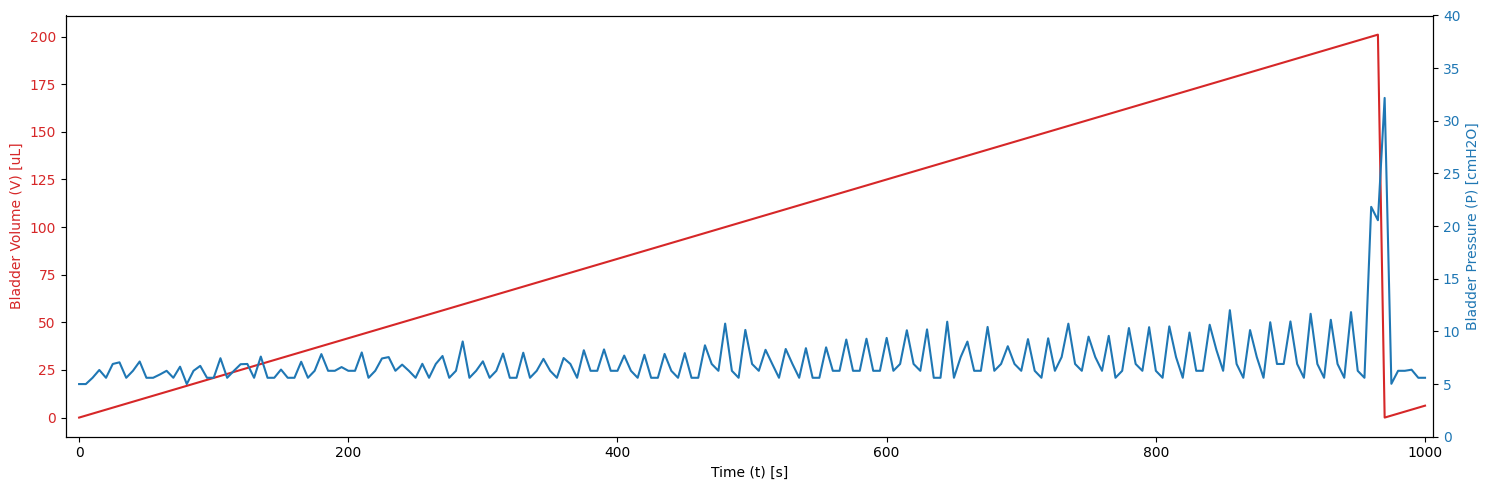

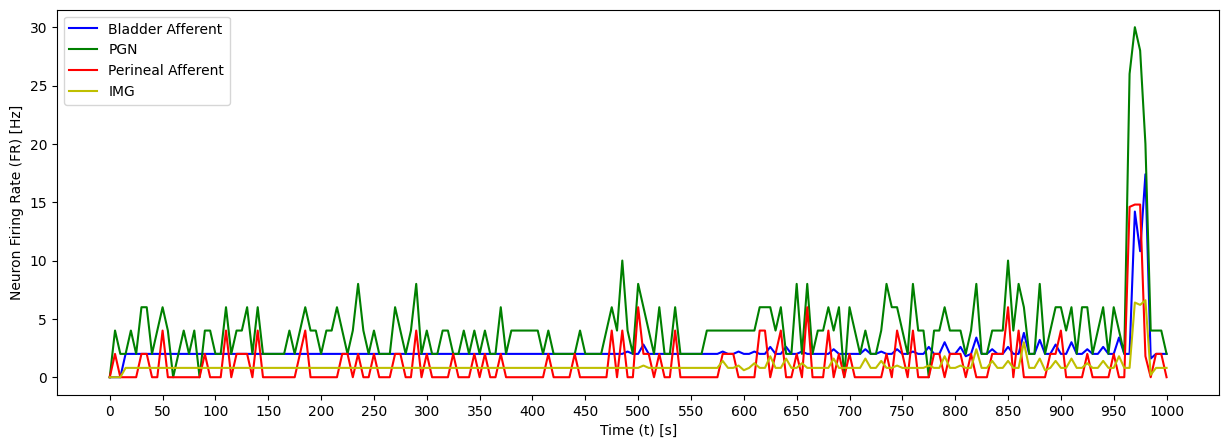

In [ ]:
import os, sys, logging, faulthandler
from bmtk.simulator import bionet
from bmtk.simulator.bionet.default_setters.cell_models import loadHOC
from bmtk.simulator.bionet.modules.sim_module import SimulatorMod
from bmtk.utils.reports.spike_trains import SpikeTrains
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from bmtk.simulator.bionet.io_tools import io
import numpy as np
from neuron import h
import pandas as pd
# from bmtk.analyzer.cell_vars import plot_report
from feedback_loop import FeedbackLoop
from plotting import plot_figure, plotting_calculator
# Import the synaptic depression/facilitation model
import synapses

import plot_results


"""
Basic Logging features, disable faulthandler if you don't want stacktraces printed
logging determines the level and file to save logs to (might be worth moving location)
"""
faulthandler.enable()
logging.basicConfig(filename='error_logs/debug_run.log', level=logging.DEBUG)

synapses.load()
logging.info('Synapses Loaded')

press_thres = 17 #17 # cm H20 #40
                 # Lingala, et al. 2016
change_thres = 10 #10 # cm H20 #10
                 # Need biological value for this

bionet.pyfunction_cache.add_cell_model(loadHOC, directive='hoc', model_type='biophysical')
logging.info('Cell model added')

def run(config_file):

    conf = bionet.Config.from_json(config_file, validate=True)
    conf.build_env()

    fbmod = FeedbackLoop()

    graph = bionet.BioNetwork.from_config(conf)
    sim = bionet.BioSimulator.from_config(conf, network=graph)
    sim.add_mod(fbmod)  # Attach the above module to the simulator.
    sim.run()

    #fbmod.save_aff(conf.output_dir)
    plot_results.run(sim=sim,conf=conf)

# if __name__ == '__main__':
#     if __file__ != sys.argv[-1]:
#         run(sys.argv[-1])
#     else:
#         run('config.json')

run(config_file='jsons/simulation_config.json')